# Исследование определяющих закономерностей успешность игры 

## Изучаем входные данные

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
from pymystem3 import Mystem
m=Mystem()
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')
import warnings

считываем датафрейм

In [2]:
try:
    games=pd.read_csv('C:\\Python\\ЯП\\сборный_проект_1\\games.csv', sep=',')

except:
    games=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')


In [3]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Переименуем все названия колонок (приведем к нижнему регистру)

In [4]:
games=games.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'            
    })

games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на наличие пропусков в данных

In [5]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в колонке name - это какой то сбой в работе сбора данных, т.к. мы далее увидим что в этих строчках почти все столбцы Nan

пропуски в столбце year_of_release могут быть обусловлены потерей данных

пропуски в столбцах critic_score, user_score и rating могут возникнуть изза того что данных просто не существует, т.е. ,например, игра суперр непопулярная и пользователи и критики не оставили отзывы. 

Переведем значения столбцов 'name','platform','genre','rating' к нижнему регистру

In [6]:
games[['name','platform','genre']]=games[['name','platform','genre']].apply(lambda x: x.astype(str).str.lower())
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Оценим размеры датасета

In [7]:
games.shape

(16715, 11)

Посмотрим на типы данных

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Считаем что необходимо перевести колонки:
- Year_of_Release ---> int
- User_Score ---> float64

Посмотрим на медианные значения по платформам

In [9]:
platform_table_median=games.pivot_table(index=['platform'], values='year_of_release', aggfunc='median').sort_values(['year_of_release'])
platform_table_median['year_of_release']=platform_table_median['year_of_release'].astype(int)
platform_table_median

,year_of_release
platform,
2600,1982
nes,1986
gg,1992
gen,1993
snes,1994
scd,1994
ng,1994
3do,1995
tg16,1995


Посмотрим на медианные значения по платформам на гистограмме

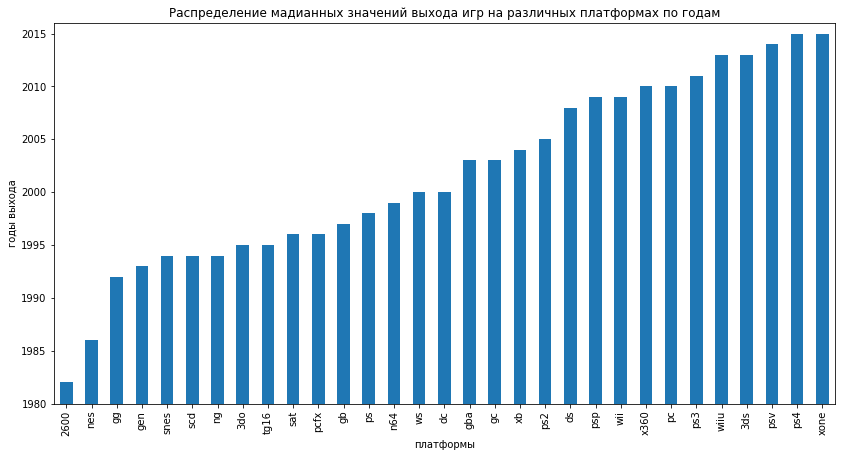

In [10]:
plt.figure()
platform_table_median.year_of_release.plot(figsize=(14,7),ylim=(1980,2016),kind = 'bar', title = 'Распределение мадианных значений выхода игр на различных платформах по годам')
plt.xlabel('платформы')
plt.ylabel('годы выхода')
plt.show()

 и на графике

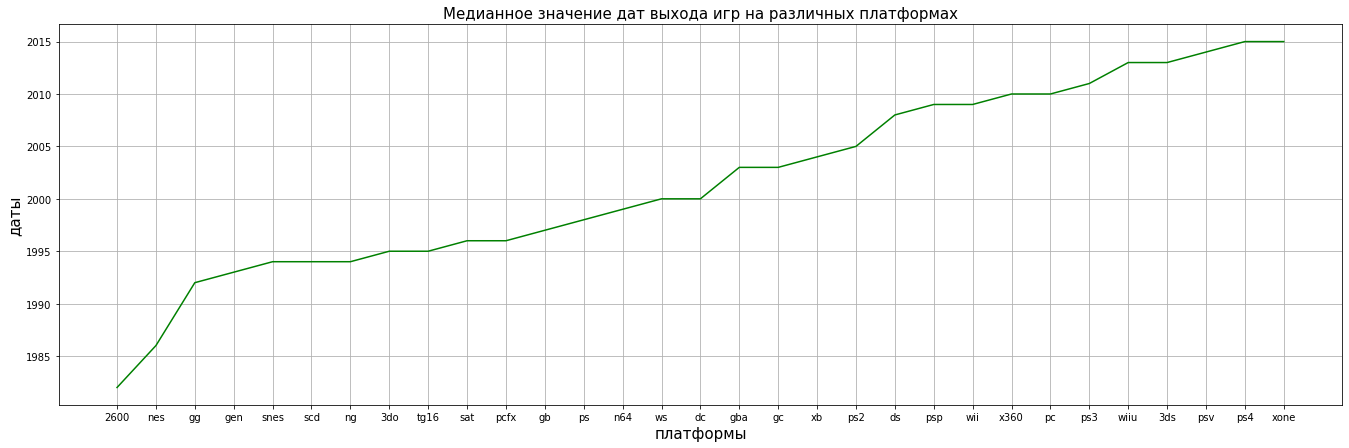

In [11]:
fig, ax = plt.subplots()

ax.plot(platform_table_median.year_of_release, color='green')


ax.set_title('Медианное значение дат выхода игр на различных платформах',fontsize = 15)
ax.grid()
ax.set_xlabel('платформы',fontsize = 15)
ax.set_ylabel('даты',fontsize = 15)

fig.set_figwidth(23)
fig.set_figheight(7)

plt.show()

Распределение мадианных значений выхода игр на различных платформах по годам самой новой является xone

Посмотрим на кол-во различных платформ в нашем датасете

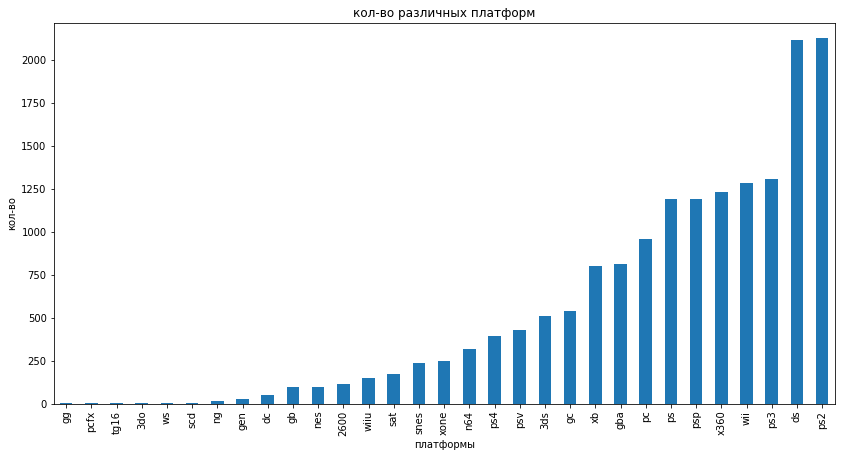

In [12]:
platform_table_max=games.pivot_table(index=['platform'], values='year_of_release', aggfunc='count').sort_values(['year_of_release'])

plt.figure()
platform_table_max.year_of_release.plot(figsize=(14,7),ylim=(0,2217),kind = 'bar', title = 'кол-во различных платформ')
plt.xlabel('платформы')
plt.ylabel('кол-во')
plt.show()

Тут 2 явных лидера: ps2 и ds

Выводы: 

При изучении исходных данных было сделано:
 - выявлены пропуски в столбцах : year_of_release, critic_score, user_score, rating, name
 - все названия столбцов были приведены к нижнему регистру. 

Было отмеченно, что:
 - Лидером выхода по медианным значениям в годах выхода игр является платформа xone. 
 - Лидерами по количеству платформ в нашем датасете являются ps2 и ds


## Устранение пропусков в данных

### Устранение пропусков в столбце "name"

Еще раз посмотрим на размерность нашего датафрейма

In [13]:
games.shape

(16715, 11)

Посмотрим на пропуски

In [14]:
games[games['name']=='nan']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,nan,gen,1993.0,nan,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,nan,gen,1993.0,nan,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Какая то загадочная игра была в 1993. Всего 2 строки и так много NaN. Удалим их.

In [15]:
games=games.drop(games[games['name']=='nan'].index)

Проверим размерность

In [16]:
games.shape

(16713, 11)

Проверим

In [17]:
games[games['name'].isnull()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропусков нет. Все ок!

###  Устранение пропусков в столбце "year_of_release"

Посмотрим на эти пропуски

In [18]:
games[games['year_of_release'].isnull()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Построим гистограммы по всем столбцам

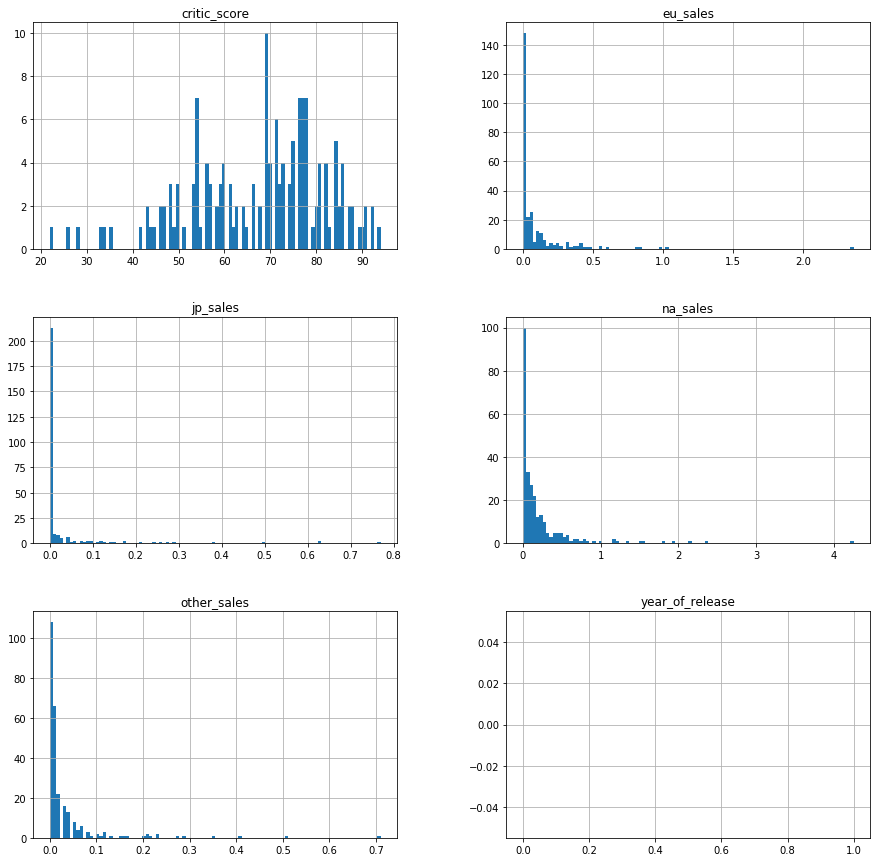

In [19]:
games[games['year_of_release'].isnull()==True].hist(figsize=(15,15), bins=100);

Для сравнения построим на гистограммы по всем столбцам не пропущенных данных (year_of_release)

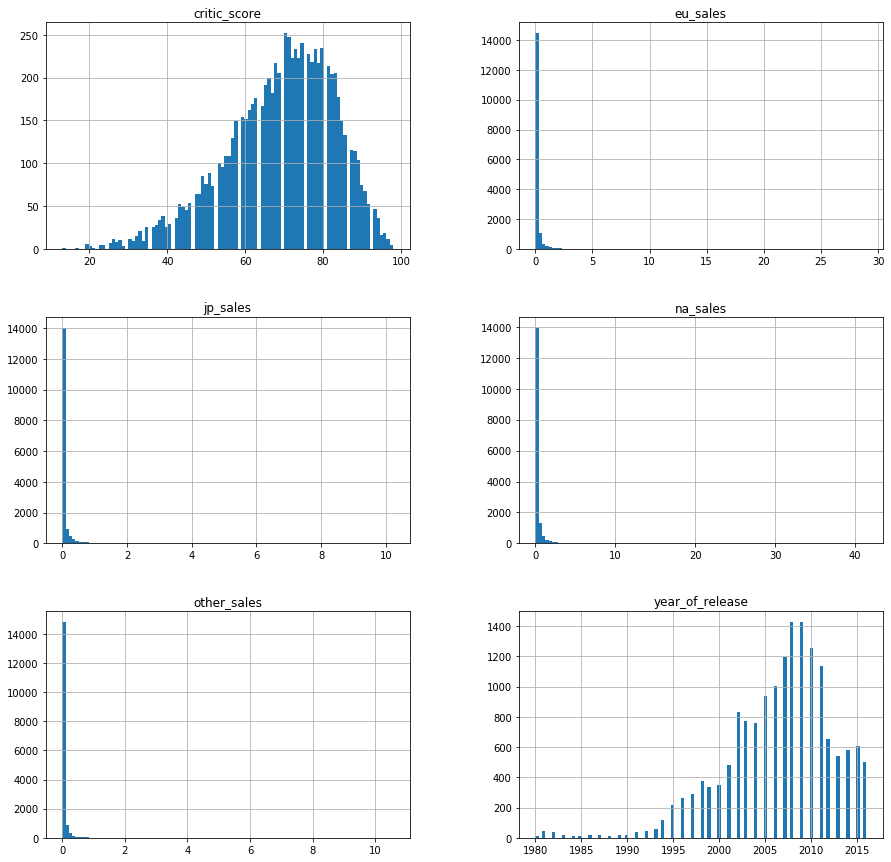

In [20]:
games[games['year_of_release'].isnull()==False].hist(figsize=(15,15), bins=100);

Видим что принципиально пропущенные значения не отличаются от не пропущенных.

самое простое-просто удалить 269 строк, т.к. это всего 1.5% от общей массы. Но мы всетаки попытаемся чтото починить в данных.

Посмотрим на первый по списку пропуск

In [21]:
games[(games['year_of_release'].isnull()==True)&(games['platform']=='ps2')&(games['genre']=='sports')].head(1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E


Обратим внимание что в названии есть 2004! Можно предположить что игра обновляется регулярно и по соседним значениям релизов можно понять в каком году вышла конкретно эта!

In [22]:
games[(games['year_of_release'].isnull()==False)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='madden nfl 2005')][['name','year_of_release']]

,name,year_of_release
238,madden nfl 2005,2004.0


In [23]:
games[(games['year_of_release'].isnull()==False)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='madden nfl 2003')][['name','year_of_release']]

,name,year_of_release
283,madden nfl 2003,2002.0


соответственно логично предположить что наш пропуск в 'Madden NFL 2004' нужно заполнить: 2003!

 Заполним пропуск

In [24]:
games[(games['year_of_release'].isnull()==True)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='madden nfl 2004')]=games[(games['year_of_release'].isnull()==True)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='madden nfl 2004')].fillna(2003)

 Но у нас больше 250 пропусков! Для удобства заполнения напишем небольшого помошника поиска похожих игр.

наша функция:

In [25]:
def funk_name (spisok,slovo):
    sp=[]
    for i in spisok:
        lemmas=m.lemmatize(i)
        for j in lemmas:
            if j==slovo:
                sp.append(i)
    return sp

составим список уникальных названий игр

In [26]:
spisok_name=games['name'].unique()
spisok_name

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

Пойдем по порядку и перейдем к следующему пропуску 

In [27]:
games[games['year_of_release'].isnull()==True].head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [28]:
group=funk_name(spisok_name, 'soccer')
for i in group:
    print(games[(games['year_of_release'].isnull()==False)&(games['name']==i)][['name','year_of_release','platform']])
    print('  ')


                name  year_of_release platform
81    fifa soccer 13           2012.0      ps3
190   fifa soccer 13           2012.0     x360
2945  fifa soccer 13           2012.0      wii
4153  fifa soccer 13           2012.0     wiiu
4438  fifa soccer 13           2012.0      psv
4821  fifa soccer 13           2012.0       pc
5300  fifa soccer 13           2012.0      psp
6028  fifa soccer 13           2012.0      3ds
  
                name  year_of_release platform
202   fifa soccer 11           2010.0      ps3
369   fifa soccer 11           2010.0     x360
1687  fifa soccer 11           2010.0      psp
1916  fifa soccer 11           2010.0      wii
2696  fifa soccer 11           2010.0      ps2
2914  fifa soccer 11           2010.0       ds
8122  fifa soccer 11           2010.0       pc
  
                                            name  year_of_release platform
250    winning eleven: pro evolution soccer 2007           2006.0      ps2
2418   winning eleven: pro evolution soccer 2

In [29]:
games[(games['year_of_release'].isnull()==True)&(games['genre']=='sports')&(games['name']=='fifa soccer 2004')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [30]:
games[(games['year_of_release'].isnull()==True)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='fifa soccer 2004')]=games[(games['year_of_release'].isnull()==True)&(games['platform']=='ps2')&(games['genre']=='sports')&(games['name']=='fifa soccer 2004')].fillna(2003)

И так далее

In [31]:
games[games['year_of_release'].isnull()==True].head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,wii,NaN,action,1.8,0.97,0.0,0.29,74.0,7.9,E10+


In [32]:
group=funk_name(spisok_name, 'batman')
for i in group:
    display(games[(games['year_of_release'].isnull()==False)&(games['name']==i)][['name','year_of_release','platform']])
    display(     )
    display(     )

,name,year_of_release,platform
164,batman: arkham city,2011.0,ps3
224,batman: arkham city,2011.0,x360
3803,batman: arkham city,2011.0,pc
5155,batman: arkham city,2012.0,wiiu


,name,year_of_release,platform
267,batman: arkham asylum,2009.0,ps3
379,batman: arkham asylum,2009.0,x360
5594,batman: arkham asylum,2009.0,pc


,name,year_of_release,platform
305,batman: arkham knight,2015.0,ps4
1274,batman: arkham knight,2015.0,xone
9460,batman: arkham knight,2015.0,pc


,name,year_of_release,platform
397,lego batman: the videogame,2008.0,x360
460,lego batman: the videogame,2008.0,ds
1519,lego batman: the videogame,2008.0,ps3
1553,lego batman: the videogame,2008.0,ps2
12465,lego batman: the videogame,2008.0,pc


,name,year_of_release,platform
692,batman: arkham origins,2013.0,ps3
915,batman: arkham origins,2013.0,x360
5703,batman: arkham origins,2013.0,pc
5730,batman: arkham origins,2013.0,wiiu


,name,year_of_release,platform
1105,lego batman 2: dc super heroes,2012.0,x360
1396,lego batman 2: dc super heroes,2012.0,wii
1690,lego batman 2: dc super heroes,2012.0,ps3
2726,lego batman 2: dc super heroes,2012.0,3ds
2963,lego batman 2: dc super heroes,2012.0,ds
5470,lego batman 2: dc super heroes,2012.0,psv
9941,lego batman 2: dc super heroes,2013.0,wiiu


,name,year_of_release,platform
2232,lego batman 3: beyond gotham,2014.0,ps4
2335,lego batman 3: beyond gotham,2014.0,x360
2774,lego batman 3: beyond gotham,2014.0,ps3
4306,lego batman 3: beyond gotham,2014.0,3ds
4331,lego batman 3: beyond gotham,2014.0,wiiu
4494,lego batman 3: beyond gotham,2014.0,xone
5863,lego batman 3: beyond gotham,2014.0,psv
12440,lego batman 3: beyond gotham,2014.0,pc


,name,year_of_release,platform
3591,batman begins,2005.0,ps2
7433,batman begins,2005.0,xb
8313,batman begins,2005.0,gba
8922,batman begins,2005.0,gc


,name,year_of_release,platform
3637,batman: vengeance,2001.0,ps2
6513,batman: vengeance,2001.0,gc
8102,batman: vengeance,2001.0,gba


,name,year_of_release,platform
4576,batman: arkham origins blackgate,2013.0,psv
6350,batman: arkham origins blackgate,2013.0,3ds


,name,year_of_release,platform
5270,batman: rise of sin tzu,2003.0,ps2
10084,batman: rise of sin tzu,2003.0,xb
12193,batman: rise of sin tzu,2003.0,gba
12517,batman: rise of sin tzu,2003.0,gc


,name,year_of_release,platform
5854,batman: arkham vr,2016.0,ps4


,name,year_of_release,platform
5942,batman: the brave and the bold the videogame,2010.0,ds
6183,batman: the brave and the bold the videogame,2010.0,wii


,name,year_of_release,platform
6427,batman: return to arkham,2016.0,ps4
10254,batman: return to arkham,2016.0,xone


,name,year_of_release,platform
8390,batman beyond: return of the joker,2000.0,ps
11058,batman beyond: return of the joker,2000.0,n64


,name,year_of_release,platform
10071,batman: dark tomorrow,2003.0,xb
11559,batman: dark tomorrow,2003.0,gc


,name,year_of_release,platform
10205,batman & robin,1998.0,ps


,name,year_of_release,platform
11213,batman: a telltale game series,2016.0,ps4
12925,batman: a telltale game series,2016.0,ps3
14356,batman: a telltale game series,2016.0,x360
14661,batman: a telltale game series,2016.0,xone


,name,year_of_release,platform
13077,batman: gotham city racer,2001.0,ps


,name,year_of_release,platform
14235,batman forever: the arcade game,1996.0,ps


тут "LEGO Batman: The Videogame" в 2008 году по всем извесным платформам, так что заполним 2008

In [33]:
games[(games['year_of_release'].isnull()==True)&(games['genre']=='action')&(games['name']=='lego batman: the videogame')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
1538,lego batman: the videogame,psp,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+


Заполним пропуски

In [34]:
games[(games['year_of_release'].isnull()==True)&(games['genre']=='action')&(games['name']=='lego batman: the videogame')]=games[(games['year_of_release'].isnull()==True)&(games['genre']=='action')&(games['name']=='lego batman: the videogame')].fillna(2003)

Следующий

In [35]:
games[games['year_of_release'].isnull()==True].head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [36]:
group=funk_name(spisok_name, 'raw')
for i in group:
    print(games[(games['year_of_release'].isnull()==False)&(games['name']==i)][['name','year_of_release','platform']])
    print('  ')


Empty DataFrame
Columns: [name, year_of_release, platform]
Index: []
  
                             name  year_of_release platform
488   wwe smackdown! vs. raw 2006           2005.0      ps2
4832  wwe smackdown! vs. raw 2006           2005.0      psp
  
                       name  year_of_release platform
515  wwe smackdown! vs. raw           2002.0      ps2
  
                            name  year_of_release platform
594   wwe smackdown vs. raw 2007           2006.0      ps2
3033  wwe smackdown vs. raw 2007           2006.0      psp
3944  wwe smackdown vs. raw 2007           2006.0     x360
  
                           name  year_of_release platform
676   wwe smackdown vs raw 2008           2007.0      ps2
1336  wwe smackdown vs raw 2008           2007.0     x360
1477  wwe smackdown vs raw 2008           2007.0      ps3
1701  wwe smackdown vs raw 2008           2007.0      psp
2105  wwe smackdown vs raw 2008           2007.0      wii
9829  wwe smackdown vs raw 2008           2007.

Видим что есть "wwe smackdown! vs. raw 2006". Видимо это чтото типа дубликата, т.к. кроме "!"-знака все остальное совпадает. Удалим его!

In [37]:
games.shape

(16713, 11)

In [38]:
games[games['name']=='wwe smackdown vs. raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [39]:
games=games.drop(games[games['name']=='wwe smackdown vs. raw 2006'].index)

In [40]:
games.shape

(16712, 11)

Следующий

In [41]:
games[games['year_of_release'].isnull()==True].head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN


In [42]:
group=funk_name(spisok_name, 'invaders')
for i in group:
    print(games[(games['year_of_release'].isnull()==False)&(games['name']==i)][['name','year_of_release','platform']])
    print('  ')


                 name  year_of_release platform
4264   space invaders           1994.0     snes
8580   space invaders           1999.0      n64
10383  space invaders           2002.0      gba
  
                                                   name  year_of_release  \
3632  simple 1500 series vol. 73: the invaders ~spac...           2001.0   

     platform  
3632       ps  
  
                                                   name  year_of_release  \
3632  simple 1500 series vol. 73: the invaders ~spac...           2001.0   

     platform  
3632       ps  
  
                          name  year_of_release platform
7804  space invaders extreme 2           2009.0       ds
  
                         name  year_of_release platform
8861   space invaders extreme           2008.0       ds
11093  space invaders extreme           2008.0      psp
  
                                                    name  year_of_release  \
9174   earth defense force 2: invaders from planet space        

Нет идей кроме как заменить медианным значением по платформе: 1981

In [43]:
games[(games['year_of_release'].isnull()==True)&(games['platform']=='2600')&(games['name']=='space invaders')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN


In [44]:
games[(games['year_of_release'].isnull()==True)&(games['platform']=='2600')&(games['name']=='space invaders')][['year_of_release']]

,year_of_release
609,NaN


In [45]:
games.loc[(games.loc[:,'year_of_release'].isnull()==True)&(games.loc[:,'platform']=='2600')&(games.loc[:,'name']=='space invaders'),'year_of_release']=games.loc[(games.loc[:,'year_of_release'].isnull()==True)&(games.loc[:,'platform']=='2600')&(games.loc[:,'name']=='space invaders'),'year_of_release'].fillna(1981)

In [46]:
games[(games['year_of_release'].isnull()==False)&(games['platform']=='2600')&(games['name']=='space invaders')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,1981.0,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN


Готово

Вообще неплохая идея заполнить все пропуски "year_of_release" медианными значениями относительно "platform", т.к. разбирать каждое значение просто очень долго, несмотря на то, что это наиболее точный вариант заполнения.

Вспомним какие медианные значения year_of_release были у каждой платформы

In [47]:
platform_table_median=platform_table_median.rename(columns={'year_of_release':'median_year_of_release'})

In [48]:
platform_table_median.reset_index(level=0,inplace=True)
platform_table_median

,platform,median_year_of_release
0,2600,1982
1,nes,1986
2,gg,1992
3,gen,1993
4,snes,1994
5,scd,1994
6,ng,1994
7,3do,1995
8,tg16,1995
9,sat,1996


In [49]:
games.shape

(16712, 11)

Примерджим эти медианные значения к основной таблице

In [50]:
games=games.merge(platform_table_median, on=['platform'], how='outer')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,2009
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,2009
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,policenauts,3do,1995.0,adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN,1995
16708,bust-a-move,3do,1994.0,puzzle,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1995
16709,sotsugyou ii: neo generation special,3do,1995.0,simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1995
16710,sonic the hedgehog 2 (8-bit),gg,1992.0,platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN,1992


In [51]:
games.shape

(16712, 12)

Проверим есть ли нулевые значения

In [52]:
games[(games['year_of_release']==0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release


Пояснение зачем сначала заменил на ноль: в составленной ниже функции funk_year_of_release если заменить на строчку if year_of_release=='NaN': то почему то функция не работает,когда ее применяю. А если сначала заменить на 0, а потом уже работать с нулем, то все получается......

In [53]:
games['year_of_release']=games['year_of_release'].fillna(0)

Наша функция которая заполняет пропуски

In [54]:
def funk_year_of_release(vec):
    
    year_of_release=vec[0]
    median_year_of_release=vec[1]
    if year_of_release==0:
        return median_year_of_release
    else:
        
        return year_of_release

применим функцию

In [55]:
games['year_of_release']=games[['year_of_release','median_year_of_release']].apply(funk_year_of_release, axis=1)

Проверим начичие 0

In [56]:
games[(games['year_of_release']==0)].head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release


Все ок! пропусков нет

###  Устранение пропусков в столбце "user_score"

User_Score — оценка пользователей (максимум 10)

In [57]:
games[(games['user_score'].isnull()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
13,mario & sonic at the olympic games,wii,2007.0,sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN,2009
24,mario & sonic at the olympic winter games,wii,2009.0,sports,1.87,1.96,0.22,0.48,NaN,NaN,NaN,2009
30,mario & sonic at the london 2012 olympic games,wii,2011.0,sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2009
44,super mario all-stars: limited edition,wii,2010.0,platform,0.99,0.52,0.92,0.14,NaN,NaN,NaN,2009
56,resident evil 4,wii,2007.0,action,1.32,0.56,0.14,0.20,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,policenauts,3do,1995.0,adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN,1995
16708,bust-a-move,3do,1994.0,puzzle,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1995
16709,sotsugyou ii: neo generation special,3do,1995.0,simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1995
16710,sonic the hedgehog 2 (8-bit),gg,1992.0,platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN,1992


Сравним наши значения где значения пропущены и не пропущены

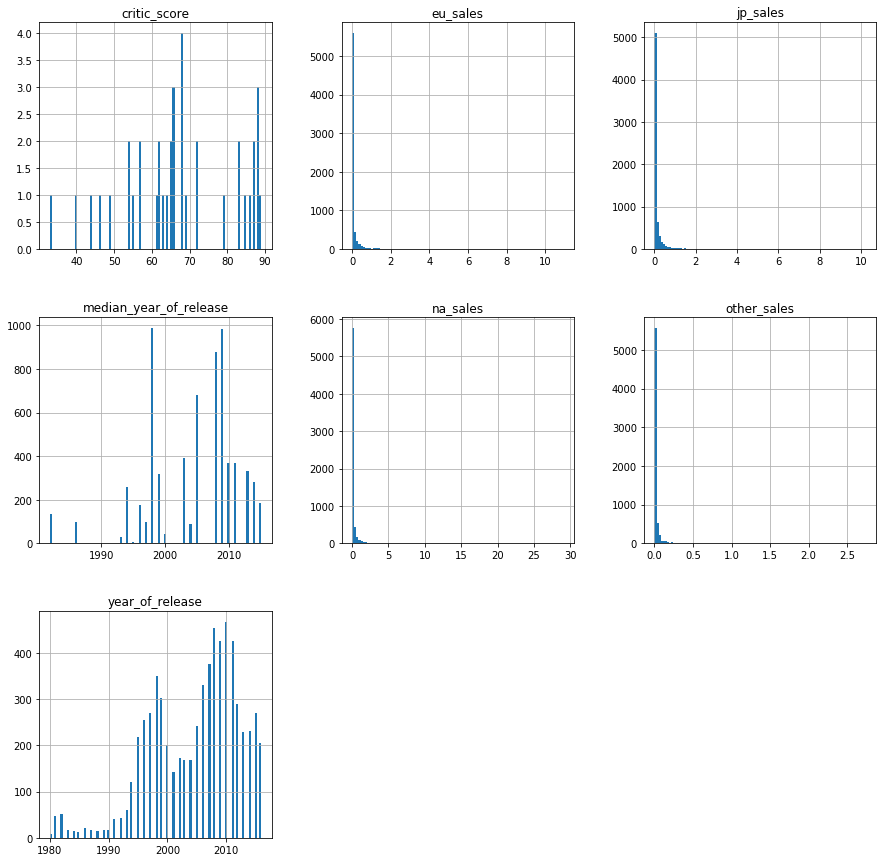

In [58]:
games[(games['user_score'].isnull()==True)].hist(figsize=(15,15),bins=100);

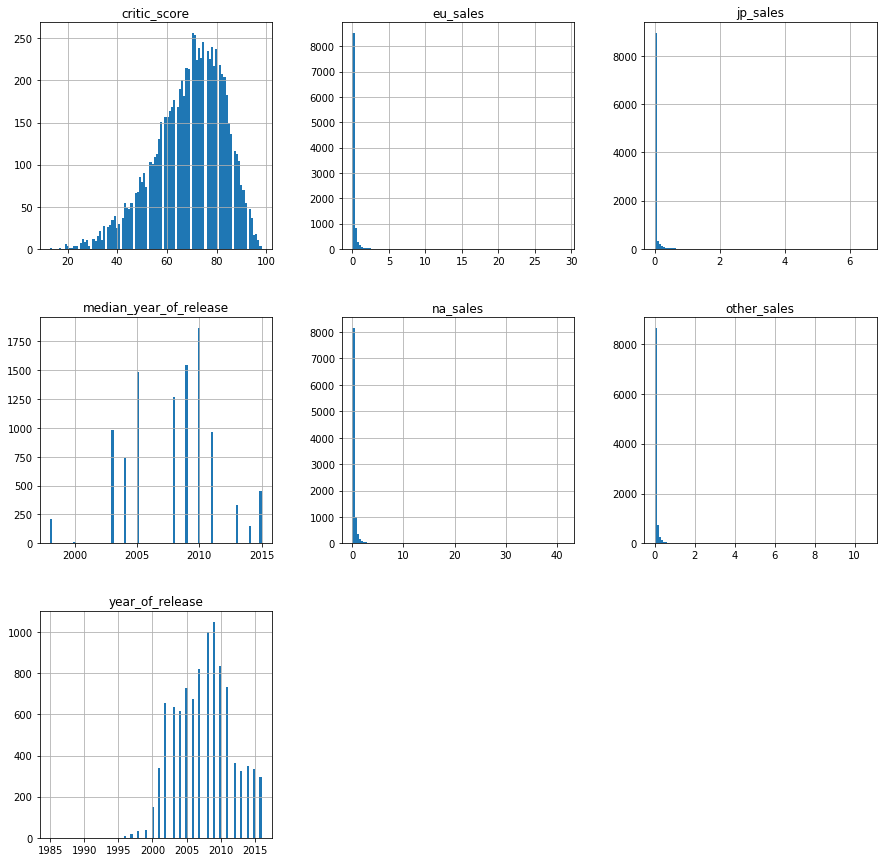

In [59]:
games[(games['user_score'].isnull()==False)].hist(figsize=(15,15),bins=100);

В целом таблицы с пропусками мало отличаются от таблиц где пропусков нет

Проверим, есть ли нули

In [60]:
games[games['user_score']==0]['name'].count()

0

Заполним все пропуски нулями - с ними как будто бы проще работать

In [62]:
games[games['user_score']==0]['name'].count()

0

Посмотрим на tbd

In [63]:
games[(games['critic_score'].isnull()==True)&(games['user_score']=='tbd')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
18,zumba fitness,wii,2010.0,sports,3.45,2.59,0.00,0.66,NaN,tbd,E,2009
40,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2009
53,just dance kids,wii,2010.0,misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2009
99,disney sing it: pop hits,wii,2009.0,misc,1.07,0.28,0.00,0.13,NaN,tbd,E,2009
131,disney sing it,wii,2008.0,misc,0.77,0.31,0.00,0.11,NaN,tbd,E,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16294,samurai warriors 4-ii,psv,2015.0,action,0.00,0.00,0.05,0.00,NaN,tbd,T,2014
16341,rugby 15,psv,2015.0,sports,0.00,0.03,0.00,0.01,NaN,tbd,E,2014
16358,looney tunes: galactic sports,psv,2015.0,action,0.00,0.02,0.00,0.01,NaN,tbd,NaN,2014
16448,rugby world cup 2015,psv,2015.0,sports,0.00,0.01,0.00,0.00,NaN,tbd,E,2014


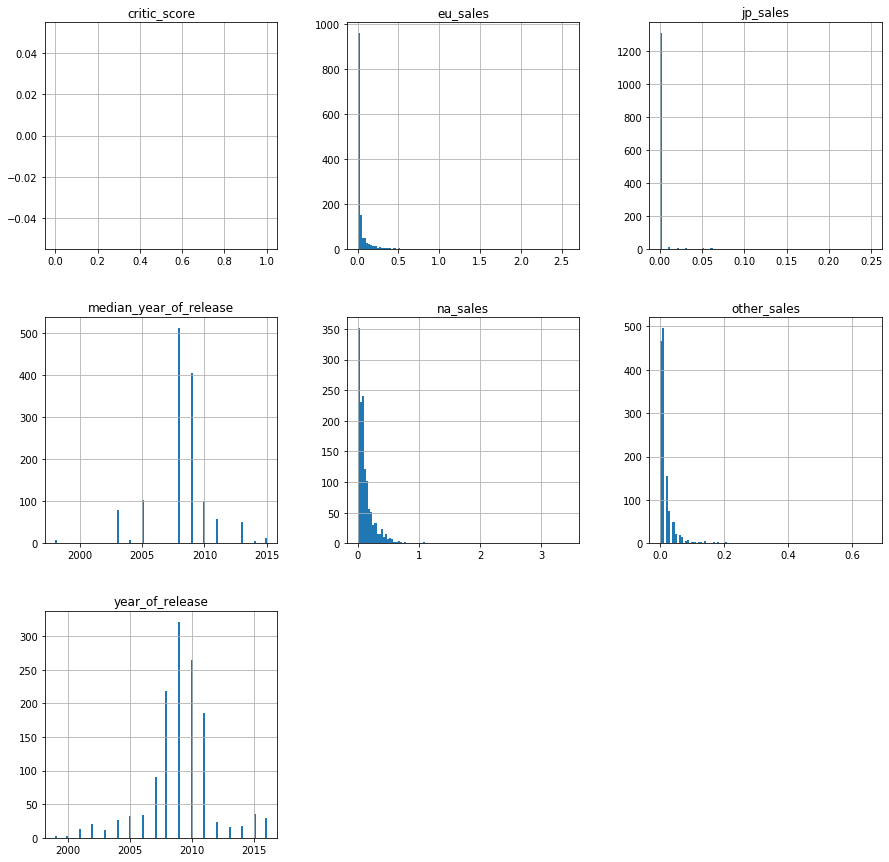

In [64]:
games[(games['critic_score'].isnull()==True)&(games['user_score']=='tbd')].hist(figsize=(15,15),bins=100);

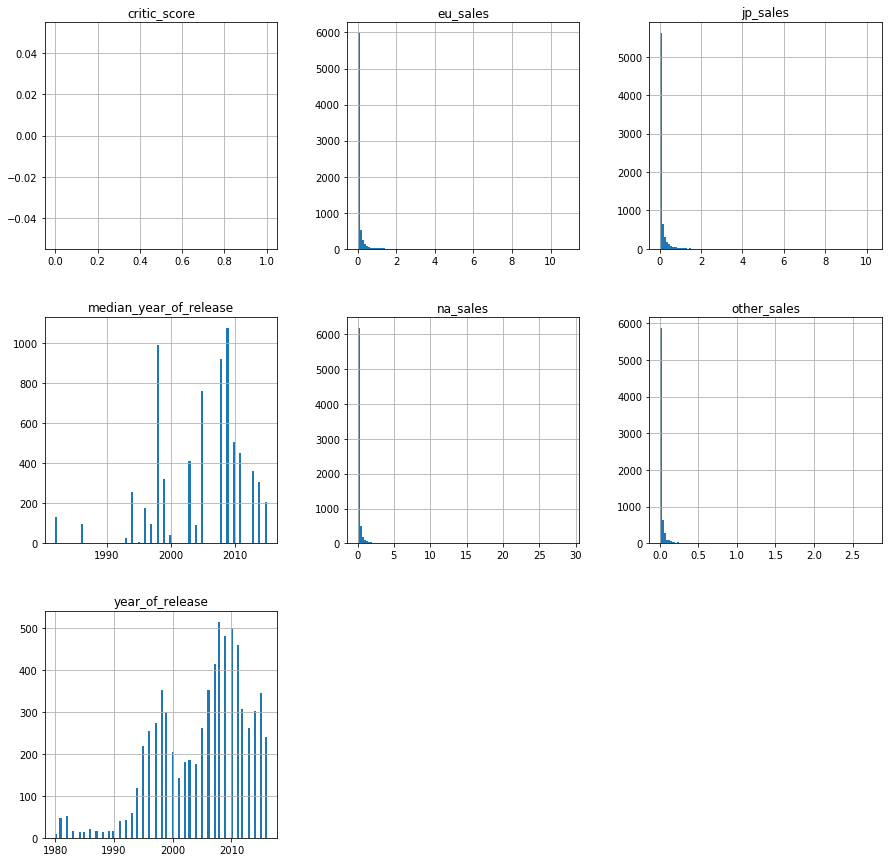

In [65]:
games[(games['critic_score'].isnull()==True)&(games['user_score']!='tbd')].hist(figsize=(15,15),bins=100);

Главное отличие заключается в том что значения 'tbd' в основном встречаются с 2007-2011 года  и очень мало в остальные года.

In [66]:
games[(games['critic_score'].isnull()==True)&(games['user_score']=='tbd')]['platform'].value_counts()

ds      513
wii     350
ps2     103
gba      69
ps3      58
psp      55
x360     54
pc       46
3ds      46
gc       11
xone      8
ps        8
xb        7
psv       6
ps4       4
wiiu      4
Name: platform, dtype: int64

In [67]:
games[(games['critic_score'].isnull()==True)&(games['user_score']!='tbd')]['platform'].value_counts()

ps      989
ds      921
ps2     759
psp     692
ps3     453
wii     385
n64     319
gba     315
3ds     306
psv     304
x360    292
snes    239
pc      213
sat     173
ps4     136
2600    133
nes      98
gb       98
gc       97
xb       92
xone     70
wiiu     53
dc       38
gen      27
ng       12
scd       6
ws        6
3do       3
tg16      2
gg        1
pcfx      1
Name: platform, dtype: int64

In [68]:
games[(games['critic_score'].isnull()==True)&(games['user_score']=='tbd')]['platform'].value_counts().sum()

1342

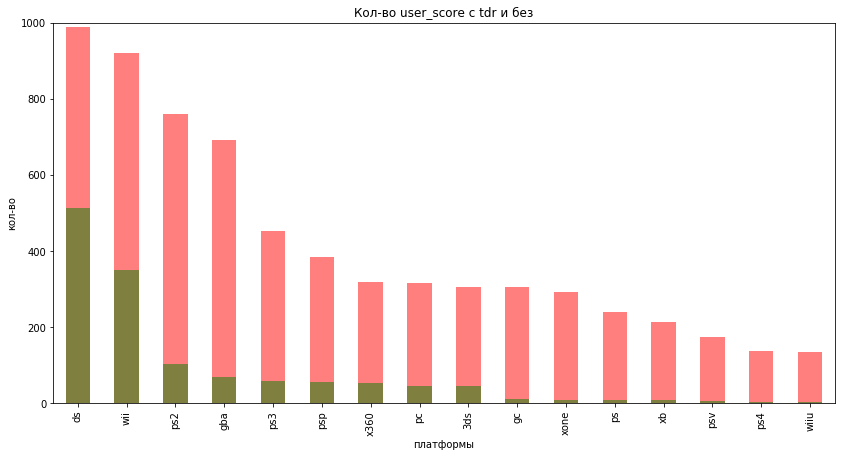

In [69]:
plt.figure()

games[(games['critic_score'].isnull()==True)&(games['user_score']!='tbd')]['platform'].value_counts().plot(figsize=(14,7),ylim=(0,1000),kind = 'bar', title = 'Кол-во user_score с tdr и без', alpha=0.5, color='red')
games[(games['critic_score'].isnull()==True)&(games['user_score']=='tbd')]['platform'].value_counts().plot(figsize=(14,7),ylim=(0,1000),kind = 'bar', alpha=0.5, color='green')
plt.xlabel('платформы')
plt.ylabel('кол-во')
plt.show()

Из гистограммы видно что:
    ds и wii сильно заполнены tdr
    в остальных платформах часть tdr небольшая

In [70]:
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
18,zumba fitness,wii,2010.0,sports,3.45,2.59,0.00,0.66,NaN,tbd,E,2009
40,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2009
49,udraw studio,wii,2010.0,misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2009
53,just dance kids,wii,2010.0,misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2009
80,game party 3,wii,2009.0,puzzle,1.40,0.16,0.00,0.12,37.0,tbd,E,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16294,samurai warriors 4-ii,psv,2015.0,action,0.00,0.00,0.05,0.00,NaN,tbd,T,2014
16341,rugby 15,psv,2015.0,sports,0.00,0.03,0.00,0.01,NaN,tbd,E,2014
16358,looney tunes: galactic sports,psv,2015.0,action,0.00,0.02,0.00,0.01,NaN,tbd,NaN,2014
16448,rugby world cup 2015,psv,2015.0,sports,0.00,0.01,0.00,0.00,NaN,tbd,E,2014


Напишем функцию которая будет менять tbd на 1

In [71]:
def funk_tbd(user_score):
    if user_score=='tbd':
        return 1
    else:
        return user_score

In [72]:
games['user_score']=games['user_score'].apply(funk_tbd)

In [73]:
games['user_score']=pd.to_numeric(games.user_score, errors='ignore',downcast='float')
games['user_score']

0        8.0
1        8.3
2        8.0
3        6.6
4        8.4
        ... 
16707    NaN
16708    NaN
16709    NaN
16710    NaN
16711    NaN
Name: user_score, Length: 16712, dtype: float32

поменяем тип данных на float

Выводы: 

Для удобства заполнили пропуски в данных нулями, т.к. оценка это очень субьективное понятие. Считаем что просто для этих данных нет оценки.
    
При анализе 'tbd' : главное отличие заключается в том что значения 'tbd' в основном встречаются с 2007-2011 года  и очень мало в остальные года.

Из полученной гистограммы видно что: ds и wii сильно заполнены tdr в остальных платформах часть tdr небольшая.

Для удобства интерпритации данных заполнили строки с tdr единичками.

###  Устранение пропусков в столбце "rating"

In [85]:
games.isnull().sum()

name                         0
platform                     0
year_of_release              0
genre                        0
na_sales                     0
eu_sales                     0
jp_sales                     0
other_sales                  0
critic_score              8575
user_score                6698
rating                    6763
median_year_of_release       0
dtype: int64

In [86]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009


In [87]:
games['rating'].unique()

array(['E', 'T', 'E10+', nan, 'M', 'EC', 'K-A', 'AO', 'RP'], dtype=object)

In [88]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009


Сгруппируем и посмотрим кол-во каждой единицы рейтинга относительно каждого жанра

In [89]:
tablica_groupby_genre=games.groupby(['genre','rating']).aggregate({'rating':'count'}).rename(columns={
    'rating':'count'
}).sort_values(['genre','count'],ascending=False)

tablica_groupby_genre

count
genre        rating       
strategy     T         162
             E10+       78
             E          70
             M          25
             K-A         2
             RP          2
sports       E        1188
             T         198
             E10+      107
             M          16
simulation   E         325
             T         190
             E10+       48
             M           5
shooter      M         565
             T         348
             E10+       58
             E          48
role-playing T         420
             M         162
             E10+      111
             E          84
racing       E         585
             T         172
             E10+       96
             M          18
             RP          1
puzzle       E         289
             E10+       43
             T          10
platform     E         358
             E10+      144
             T          64
             M           3
misc         E         457
             T         239
             E10+      167
             M          13
             EC          5
             K-A         1
fighting     T         362
             M          49
             E10+       19
             E           8
adventure    E         162
             T         115
             M          99
             E10+       68
             EC          2
action       T         681
             M         608
             E10+      481
             E         416
             AO          1
             EC          1

<Figure size 432x288 with 0 Axes>

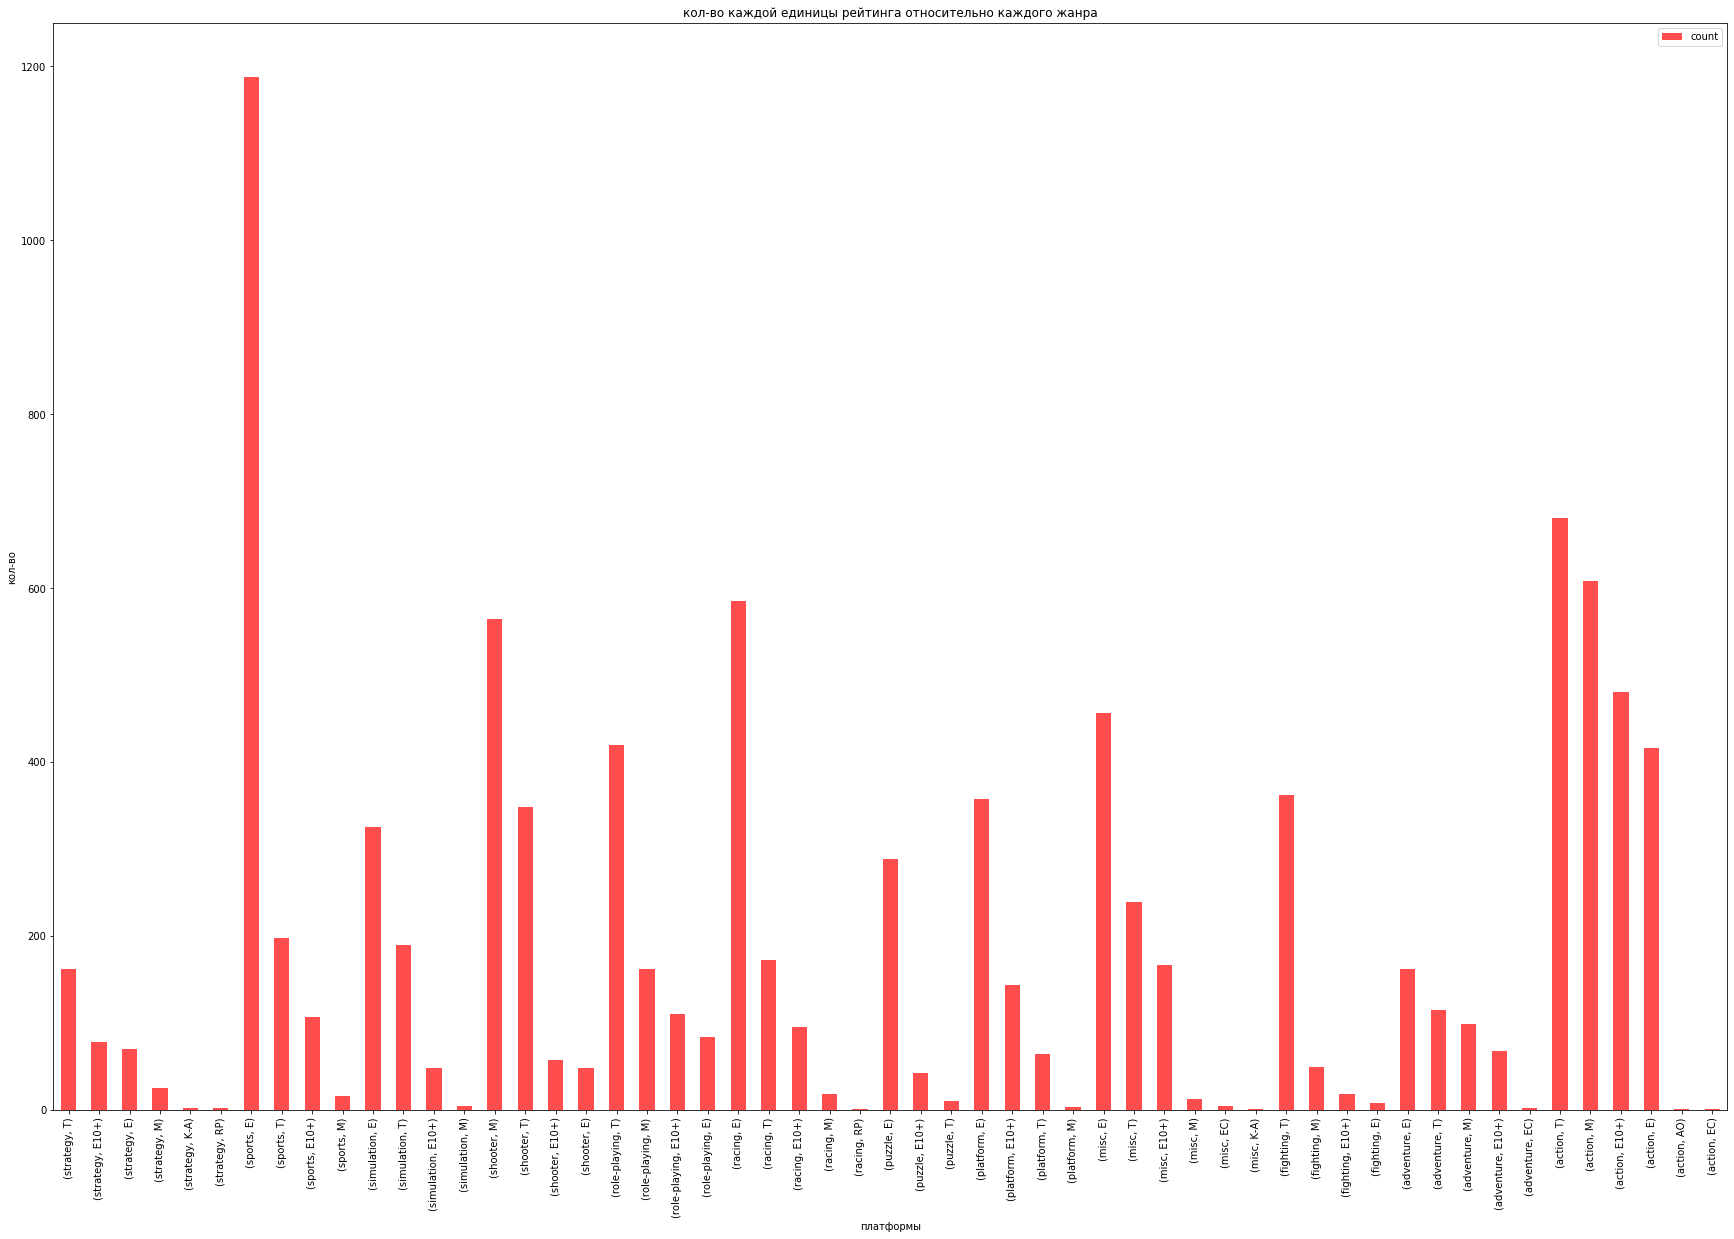

In [90]:


plt.figure()
tablica_groupby_genre.plot(figsize=(30,20),ylim=(0,1250),kind = 'bar', title = 'кол-во каждой единицы рейтинга относительно каждого жанра', alpha=0.7, color='red')


plt.xlabel('платформы')
plt.ylabel('кол-во')
plt.show()

В жанре stratagy наибольшее кол-во у рейтинга T, наименьшее у RP

В жанре sports наибольшее кол-во у рейтинга E, наименьшее у M

В жанре simulation наибольшее кол-во у рейтинга E, наименьшее у M

В жанре shooter наибольшее кол-во у рейтинга M, наименьшее у E

В жанре role-playing наибольшее кол-во у рейтинга T, наименьшее у E

В жанре racing наибольшее кол-во у рейтинга E, наименьшее у RP

В жанре puzzle наибольшее кол-во у рейтинга E, наименьшее у T

В жанре platform наибольшее кол-во у рейтинга E, наименьшее у M

В жанре misc наибольшее кол-во у рейтинга E, наименьшее у K-A

В жанре fighting наибольшее кол-во у рейтинга T, наименьшее у E

В жанре action наибольшее кол-во у рейтинга T, наименьшее у AO и EC

В жанре adventure наибольшее кол-во у рейтинга E, наименьшее у EC


In [91]:
tablica_groupby_genre=games.groupby(['rating','genre']).aggregate({'rating':'count'}).rename(columns={
    'rating':'count'
}).sort_values(['rating','count'],ascending=False)

tablica_groupby_genre

count
rating genre              
T      action          681
       role-playing    420
       fighting        362
       shooter         348
       misc            239
       sports          198
       simulation      190
       racing          172
       strategy        162
       adventure       115
       platform         64
       puzzle           10
RP     strategy          2
       racing            1
M      action          608
       shooter         565
       role-playing    162
       adventure        99
       fighting         49
       strategy         25
       racing           18
       sports           16
       misc             13
       simulation        5
       platform          3
K-A    strategy          2
       misc              1
EC     misc              5
       adventure         2
       action            1
E10+   action          481
       misc            167
       platform        144
       role-playing    111
       sports          107
       racing           96
       strategy         78
       adventure        68
       shooter          58
       simulation       48
       puzzle           43
       fighting         19
E      sports         1188
       racing          585
       misc            457
       action          416
       platform        358
       simulation      325
       puzzle          289
       adventure       162
       role-playing     84
       strategy         70
       shooter          48
       fighting          8
AO     action            1

<Figure size 432x288 with 0 Axes>

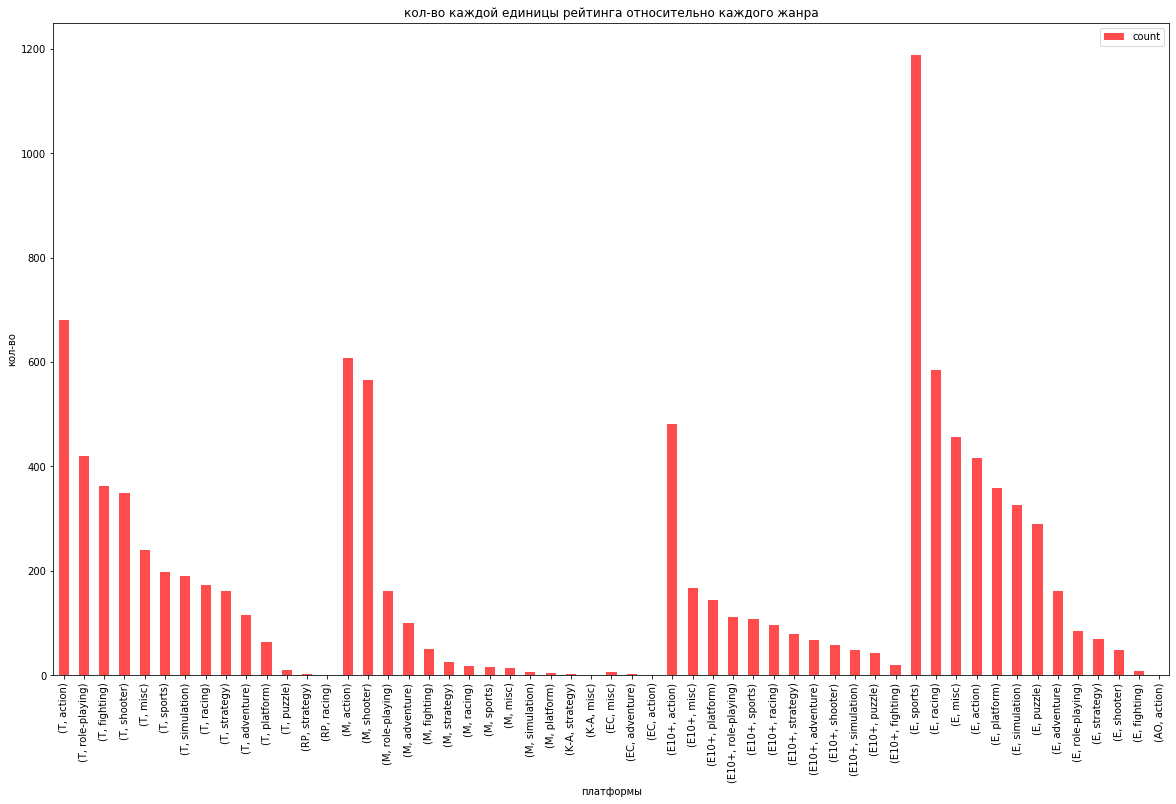

In [92]:
plt.figure()
tablica_groupby_genre.plot(figsize=(20,12),ylim=(0,1250),kind = 'bar', title = 'кол-во каждой единицы рейтинга относительно каждого жанра', alpha=0.7, color='red')


plt.xlabel('платформы')
plt.ylabel('кол-во')
plt.show()

У рейтинга Т приобладает жанр action, почти отсутствует puzzle

У рейтинга M приобладает жанр action, почти отсутствует platform

У рейтинга E10+ приобладает жанр action, почти отсутствует fighting

У рейтинга E приобладает жанр sports, почти отсутствует fighting


остальные рейтинги малочисленны





Посмотрим а что у нас в долях (процентах)

In [93]:
tablica_mean_genre=games.pivot_table(index=['genre'], values=['rating'], aggfunc={
    'rating':'count'
}).rename(columns={'rating':'count_rating'})
tablica_mean_genre=tablica_mean_genre.sort_values('count_rating',ascending=False)
tablica_mean_genre['procent']=tablica_mean_genre['count_rating']/sum(tablica_mean_genre['count_rating'])*100
tablica_mean_genre

,count_rating,procent
genre,,
action,2188,21.992160
sports,1509,15.167354
shooter,1019,10.242235
misc,882,8.865213
racing,872,8.764700
role-playing,777,7.809830
platform,569,5.719168
simulation,568,5.709116
adventure,446,4.482863


Самым распростроненным жанром является action - 22% от общей массы

построим еще гистограммы по самым популярным рейтингам

In [94]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009


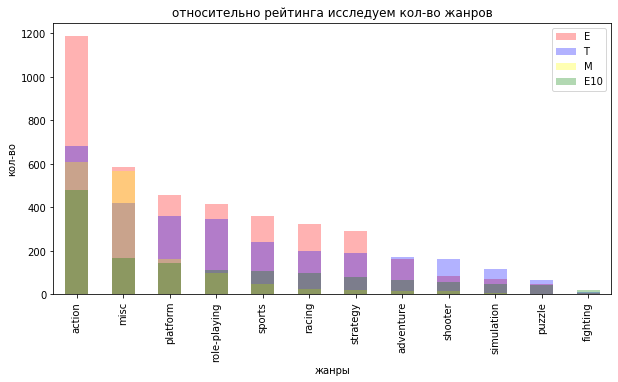

In [95]:
games_genre_E=games[games['rating']=='E'].rename(columns={'genre':'E'})
games_genre_T=games[games['rating']=='T'].rename(columns={'genre':'T'})
games_genre_M=games[games['rating']=='M'].rename(columns={'genre':'M'})
games_genre_E10=games[games['rating']=='E10+'].rename(columns={'genre':'E10'})

plt.figure()
games_genre_E['E'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', title = 'относительно рейтинга исследуем кол-во жанров',legend=('E'), alpha=0.3, color='red')
games_genre_T['T'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='blue',legend=('T'))
games_genre_M['M'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='yellow',legend=('M'))
games_genre_E10['E10'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='green',legend=('E10'))


plt.xlabel('жанры')
plt.ylabel('кол-во')
plt.show()


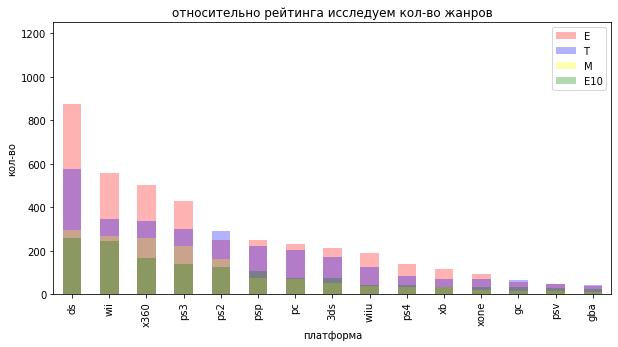

In [96]:
games_platform_E=games[games['rating']=='E'].rename(columns={'platform':'E'})
games_platform_T=games[games['rating']=='T'].rename(columns={'platform':'T'})
games_platform_M=games[games['rating']=='M'].rename(columns={'platform':'M'})
games_platform_E10=games[games['rating']=='E10+'].rename(columns={'platform':'E10'})


plt.figure()
games_platform_E['E'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', title = 'относительно рейтинга исследуем кол-во жанров',legend=('E'), alpha=0.3, color='red')
games_platform_T['T'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='blue',legend=('T'))
games_platform_M['M'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='yellow',legend=('M'))
games_platform_E10['E10'].value_counts().plot(figsize=(10,5),ylim=(0,1250),kind = 'bar', alpha=0.3, color='green',legend=('E10'))


plt.xlabel('платформа')
plt.ylabel('кол-во')
plt.show()


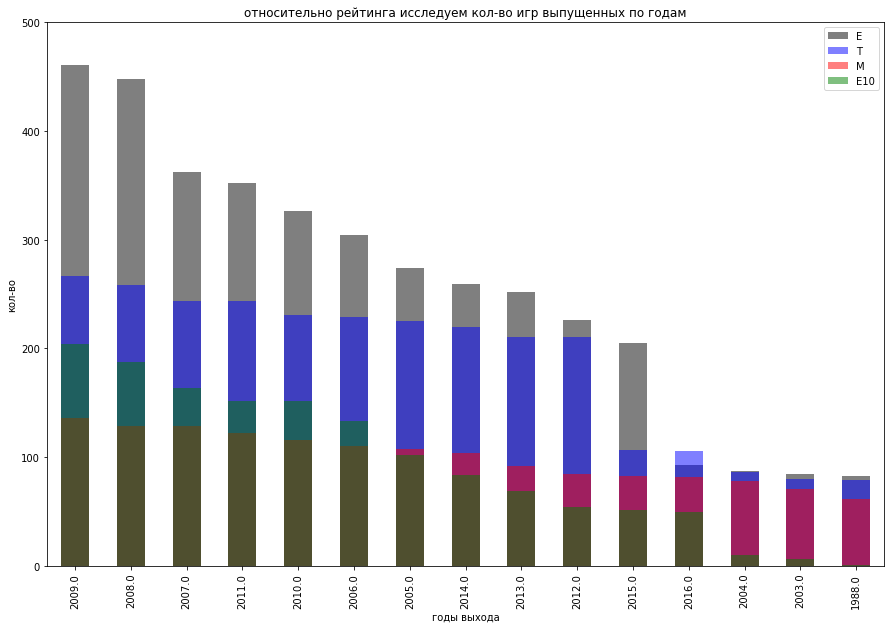

In [97]:
games_year_of_release_E=games[games['rating']=='E'].rename(columns={'year_of_release':'E'})
games_year_of_release_T=games[games['rating']=='T'].rename(columns={'year_of_release':'T'})
games_year_of_release_M=games[games['rating']=='M'].rename(columns={'year_of_release':'M'})
games_year_of_release_E10=games[games['rating']=='E10+'].rename(columns={'year_of_release':'E10'})



plt.figure()
games_year_of_release_E['E'].value_counts().plot(figsize=(15,10),ylim=(0,500),kind = 'bar', title = 'относительно рейтинга исследуем кол-во игр выпущенных по годам', alpha=0.5, color='black',legend=('E'))
games_year_of_release_T['T'].value_counts().plot(figsize=(15,10),ylim=(0,500),kind = 'bar', alpha=0.5, color='blue',legend=('T'))
games_year_of_release_M['M'].value_counts().plot(figsize=(15,10),ylim=(0,500),kind = 'bar', alpha=0.5, color='red',legend=('M'))
games_year_of_release_E10['E10'].value_counts().plot(figsize=(15,10),ylim=(0,500),kind = 'bar', alpha=0.5, color='green',legend=('E10+'))


plt.xlabel('годы выхода')
plt.ylabel('кол-во')
plt.show()

самый "урожайный" год был 2009

In [98]:
games.isnull().sum()

name                         0
platform                     0
year_of_release              0
genre                        0
na_sales                     0
eu_sales                     0
jp_sales                     0
other_sales                  0
critic_score              8575
user_score                6698
rating                    6763
median_year_of_release       0
dtype: int64

Ранее мы обратили внимание что у жанров sport  и racing в основном рейтинг Е. Им и заменим пропуски в этих категориях

In [99]:
games[(games['rating'].isnull()==True)&
      (games['genre']=='sports')|
      (games['rating'].isnull()==True)&
      (games['genre']=='racing')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
13,mario & sonic at the olympic games,wii,2007.0,sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN,2009
24,mario & sonic at the olympic winter games,wii,2009.0,sports,1.87,1.96,0.22,0.48,NaN,NaN,NaN,2009
30,mario & sonic at the london 2012 olympic games,wii,2011.0,sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2009
100,new play control! mario power tennis,wii,2009.0,sports,0.35,0.69,0.28,0.14,NaN,NaN,NaN,2009
102,sonic & sega all-stars racing,wii,2010.0,racing,0.61,0.68,0.00,0.15,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
16647,worldwide soccer,sat,1994.0,sports,0.00,0.00,0.06,0.00,NaN,NaN,NaN,1996
16662,world series baseball,sat,1994.0,sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN,1996
16678,pebble beach golf links,sat,1994.0,sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1996
16683,formula one world championship: beyond the limit,scd,1994.0,racing,0.00,0.00,0.07,0.00,NaN,NaN,NaN,1994


In [100]:
games.loc[(games.loc[:,'rating'].isnull()==True)&
          (games.loc[:,'genre']=='sports')|
          (games.loc[:,'rating'].isnull()==True)&
          (games.loc[:,'genre']=='racing'),'rating']=
games.loc[(games.loc[:,'rating'].isnull()==True)&
          (games.loc[:,'genre']=='sports')|
          (games.loc[:,'rating'].isnull()==True)&
          (games.loc[:,'genre']=='racing'),'rating'].fillna('E')

In [101]:
games.isnull().sum()

name                         0
platform                     0
year_of_release              0
genre                        0
na_sales                     0
eu_sales                     0
jp_sales                     0
other_sales                  0
critic_score              8575
user_score                6698
rating                    5547
median_year_of_release       0
dtype: int64

Часть пропусков заполнили. Остальные корректно заполнить, без дополнительных данных не представляется возможным. Заполним пропуски словом "unknown".

In [102]:
games.rating=games.rating.fillna('unknown')
games.rating

0              E
1              E
2              E
3              E
4              E
          ...   
16707    unknown
16708    unknown
16709    unknown
16710    unknown
16711    unknown
Name: rating, Length: 16712, dtype: object

In [103]:
games.isnull().sum()

name                         0
platform                     0
year_of_release              0
genre                        0
na_sales                     0
eu_sales                     0
jp_sales                     0
other_sales                  0
critic_score              8575
user_score                6698
rating                       0
median_year_of_release       0
dtype: int64

Пропусков больше нет

Выводы: 
    
Мы проанализировали данные относительно жанров и платформ:
 - В жанре stratagy наибольшее кол-во у рейтинга T, наименьшее у RP
 - В жанре sports наибольшее кол-во у рейтинга E, наименьшее у M
 - В жанре simulation наибольшее кол-во у рейтинга E, наименьшее у M
 - В жанре shooter наибольшее кол-во у рейтинга M, наименьшее у E
 - В жанре role-playing наибольшее кол-во у рейтинга T, наименьшее у E
 - В жанре racing наибольшее кол-во у рейтинга E, наименьшее у RP
 - В жанре puzzle наибольшее кол-во у рейтинга E, наименьшее у T
 - В жанре platform наибольшее кол-во у рейтинга E, наименьшее у M
 - В жанре misc наибольшее кол-во у рейтинга E, наименьшее у K-A
 - В жанре fighting наибольшее кол-во у рейтинга T, наименьшее у E
 - В жанре action наибольшее кол-во у рейтинга T, наименьшее у AO и EC
 - В жанре adventure наибольшее кол-во у рейтинга E, наименьшее у EC



 - У рейтинга Т приобладает жанр action, почти отсутствует puzzle
 - У рейтинга M приобладает жанр action, почти отсутствует platform
 - У рейтинга E10+ приобладает жанр action, почти отсутствует fighting
 - У рейтинга E приобладает жанр sports, почти отсутствует fighting

Самым распростроненным жанром является action - 22% от общей массы. Антирекорд поставил жанр strategy. 

Самый "урожайный" год относительно выхода игр был 2009.

Заполнили пропуски в рейтинге жанров sport  и racing категорией Е. Остальные пропуски без дополнительных данных корректно заполнить не получится. Дали им «рейтинг» unknown.



### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [104]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009


In [105]:
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009,28.91
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,28.32


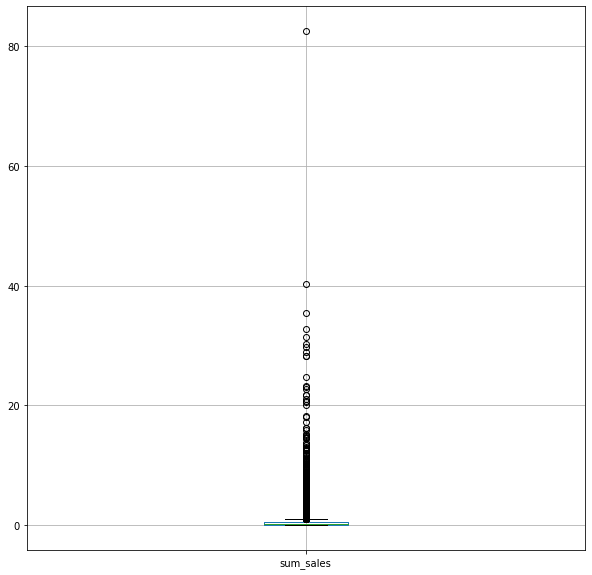

In [106]:
games[['sum_sales']].boxplot(figsize=(10,10))

Видим что у нас есть ряд выбросов и один прям очень сильный! посмотрим на него.

In [107]:
games[['sum_sales']].max()

sum_sales    82.54
dtype: float64

Это  игра wii sports 	

In [108]:
games[games['name']=='wii sports']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54


In [109]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52


In [110]:
tablica_groupby_genre_1=games.groupby(['genre','rating']).aggregate({'rating':'count','sum_sales':'sum'}).rename(columns={
    'rating':'count'
}).sort_values(['genre','count'],ascending=False)

tablica_groupby_genre_1['count_sales']=tablica_groupby_genre_1['sum_sales']/tablica_groupby_genre_1['count']*100

tablica_groupby_genre_1

count  sum_sales  count_sales
genre    rating                                
strategy unknown    344      92.38    26.854651
         T          162      33.88    20.913580
         E10+        78      19.34    24.794872
         E           70      20.77    29.671429
         M           25       5.37    21.480000
...                 ...        ...          ...
action   M          608     601.70    98.963816
         E10+       481     218.89    45.507277
         E          416     198.33    47.675481
         AO           1       1.96   196.000000
         EC           1       0.45    45.000000

[65 rows x 3 columns]

<Figure size 432x288 with 0 Axes>

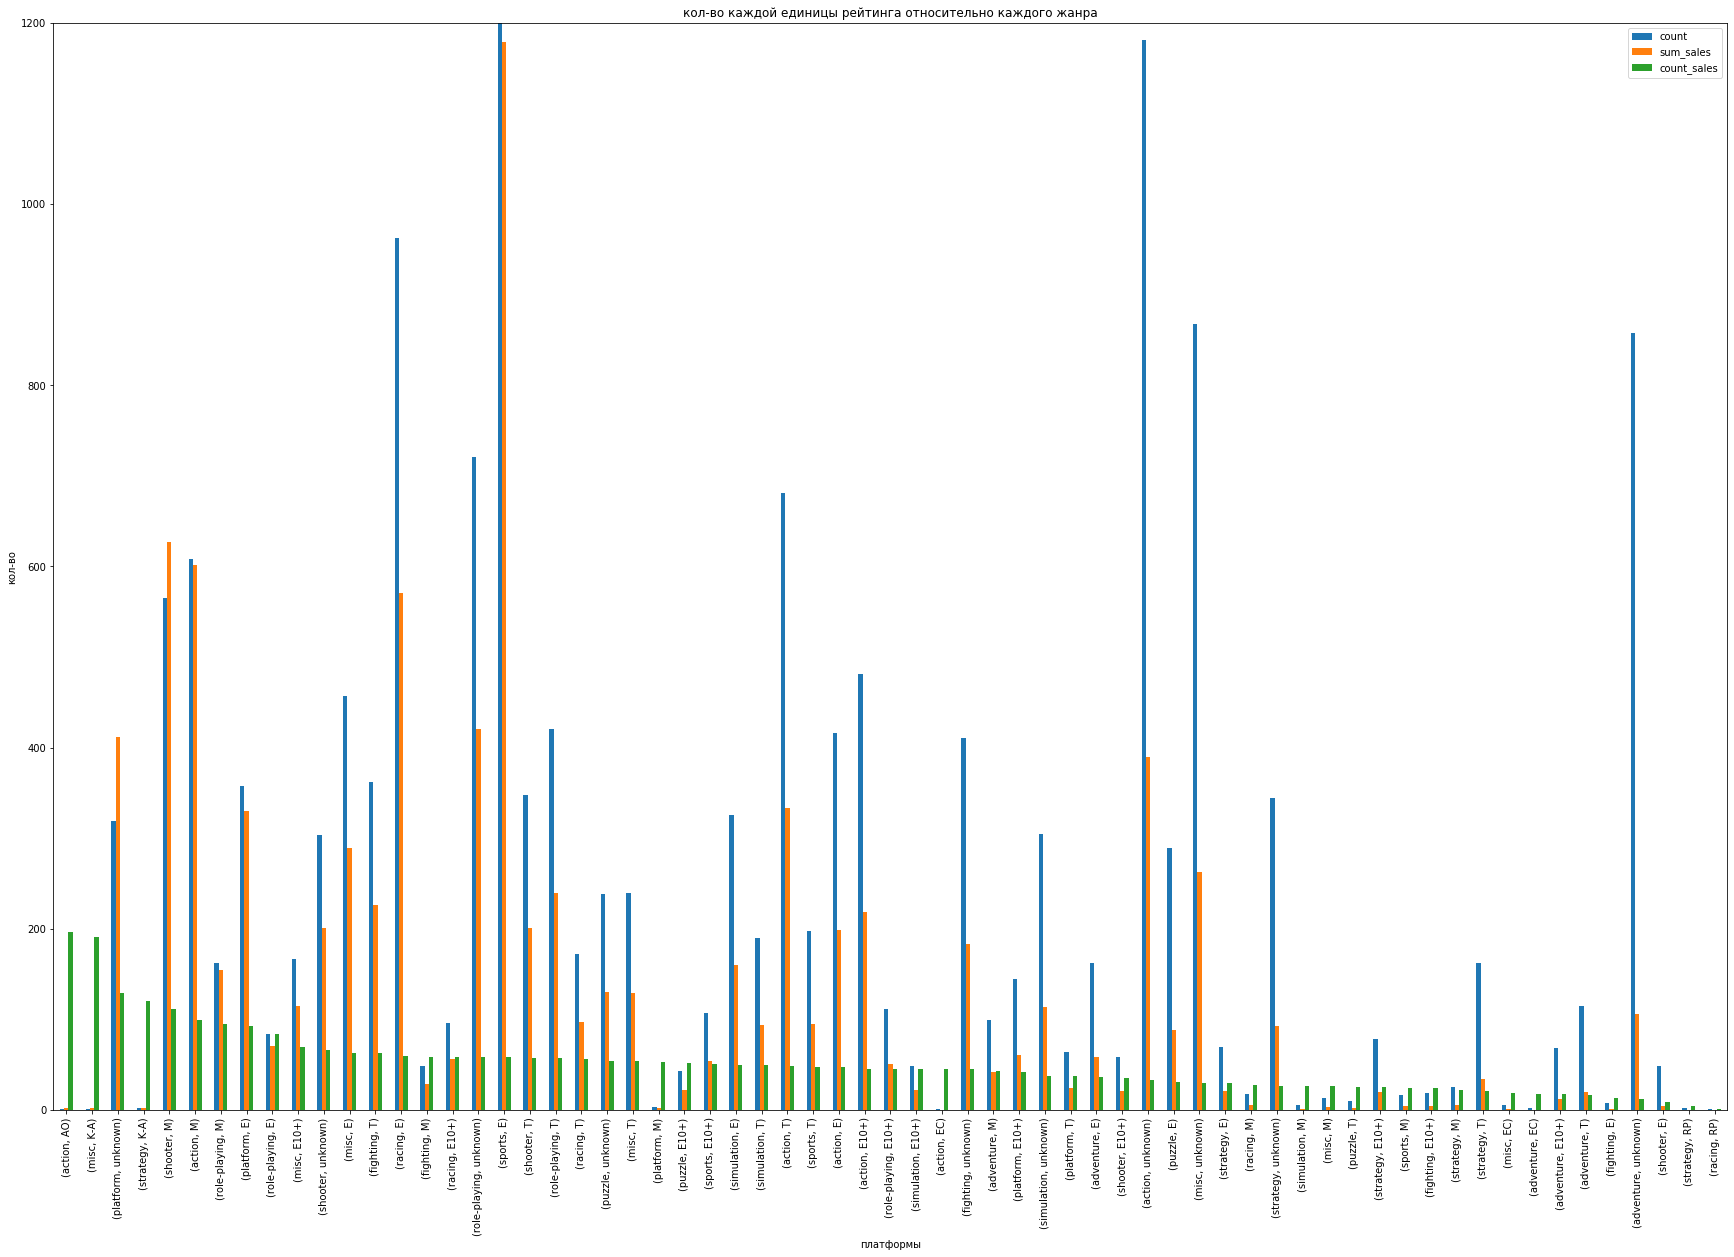

In [111]:
plt.figure()
tablica_groupby_genre_1.sort_values('count_sales', ascending=False).plot(figsize=(30,20),ylim=(0,1200),kind = 'bar', title = 'кол-во каждой единицы рейтинга относительно каждого жанра',)


plt.xlabel('платформы')
plt.ylabel('кол-во')
plt.show()

Выводы:

Показатели где мало данных в расчет брать не будем! Поэтому по критерию count_sales - удельная цена игры у нас лидеры:
   - shooter:M
   - action:M
   - role-playing:M
   - platform:E
   - role-playing:E

## Анализ данных

### Проанализируем сколько игр выпускалось в разные годы. 

In [112]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77


In [113]:
table_year=games.groupby('year_of_release').agg({'name':'count'}).rename(columns={'name':'count_games'})
table_year=table_year.reset_index()
table_year

,year_of_release,count_games
0,1980.0,9
1,1981.0,47
2,1982.0,52
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


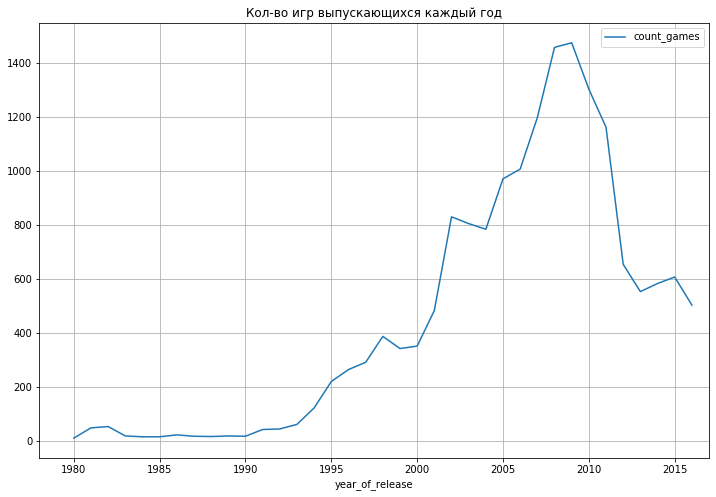

In [114]:
table_year.plot(y='count_games',x='year_of_release', style='-', xlim=(1978,2017), grid=True, figsize=(12, 8)).set_title('Кол-во игр выпускающихся каждый год'); 

Из графика видно что примерно с 1993 года кол-во игр начало расти!

In [115]:
table_year.sort_values('count_games', ascending=False)

,year_of_release,count_games
29,2009.0,1474
28,2008.0,1457
30,2010.0,1302
27,2007.0,1197
31,2011.0,1161
26,2006.0,1006
25,2005.0,970
22,2002.0,829
23,2003.0,804
24,2004.0,783


Вывод: 

Самыми "урожайными" оказались 2008 и 2009 годы. Тогда было выпущено 1457 и 1474 игры, соответственно.
Год, когда было выпущено минимальное кол-во игр : 1980.(что закономерно, если вспомнить на каком уровне и насколько доступными тогда были персоналки). Считаем что период до 1993 года не важен(горизонтальная кривая), не смотря на то, что тогдп вышла хитовая игра всех времён: "super mario".

Возможные причины(догадки) по спаду в индустрии:
- свое влияние оказали и мобильные игры, которые забрали часть рынка на себя. 
- из-за криптовалюты дорожает железо и просто стало дороже иметь приставку или хороший комп.
- законодательный хайп защиты детей от "вреда" игр делает свое дело.


### Проанализируем как менялись продажи по платформам. 

In [116]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77


In [117]:
tablica_sum_sales=games.groupby(['platform']).aggregate({'sum_sales':'sum','year_of_release':'median'}).sort_values(['sum_sales'],ascending=False)
tablica_sum_sales['year_of_release']=tablica_sum_sales['year_of_release'].astype(int)
tablica_sum_sales=tablica_sum_sales
tablica_sum_sales

,sum_sales,year_of_release
platform,,
ps2,1252.77,2005
x360,971.42,2010
ps3,939.65,2011
wii,907.51,2009
ds,806.12,2008
ps,730.86,1998
gba,317.85,2003
ps4,314.14,2015
psp,294.05,2009


платформы с наибольшими суммарными продажами

Отсортируем их по годам

In [118]:
tablica_sum_sales.sort_values('year_of_release')

,sum_sales,year_of_release
platform,,
2600,96.98,1982
nes,251.05,1986
gg,0.04,1992
gen,28.35,1993
snes,200.04,1994
ng,1.44,1994
scd,1.86,1994
3do,0.10,1995
tg16,0.16,1995


Выведем границы когда платформы появились и умерли. Определим длину жизни платформ.

In [119]:
tablica_platform_long_life=games.groupby(['platform']).aggregate({'year_of_release':'min'}).rename(columns={'year_of_release':'year_of_release_min'})
tablica_platform_long_life['year_of_release_max']=games.groupby(['platform']).aggregate({'year_of_release':'max'})
tablica_platform_long_life['long_life']=tablica_platform_long_life['year_of_release_max']-tablica_platform_long_life['year_of_release_min']
tablica_platform_long_life=tablica_platform_long_life.sort_values('long_life',ascending=False)
tablica_platform_long_life

,year_of_release_min,year_of_release_max,long_life
platform,,,
pc,1985.0,2016.0,31.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
wii,2003.0,2016.0,13.0
psp,2003.0,2015.0,12.0
x360,2005.0,2016.0,11.0
ps2,2000.0,2011.0,11.0
nes,1983.0,1994.0,11.0
dc,1998.0,2008.0,10.0


In [120]:
tablica_platform_long_life.long_life.median()

6.0

In [121]:
tablica_platform_long_life.long_life.mean()

7.741935483870968

Медианное значение жизни платформы 6 лет. Среднее: четь меньше 8 лет.

In [122]:
tablica_mega_platform=tablica_platform_long_life[tablica_platform_long_life['year_of_release_max']==2016]
tablica_mega_platform

,year_of_release_min,year_of_release_max,long_life
platform,,,
pc,1985.0,2016.0,31.0
wii,2003.0,2016.0,13.0
x360,2005.0,2016.0,11.0
ps3,2006.0,2016.0,10.0
3ds,2011.0,2016.0,5.0
psv,2011.0,2016.0,5.0
wiiu,2012.0,2016.0,4.0
xone,2013.0,2016.0,3.0
ps4,2013.0,2016.0,3.0


Это список платформ которые еще действую на "данный для задачи" момент (2016 год)

In [123]:
tablica_mega_platform_no_index=tablica_mega_platform.reset_index(level=0)
tablica_mega_platform_no_index

,platform,year_of_release_min,year_of_release_max,long_life
0,pc,1985.0,2016.0,31.0
1,wii,2003.0,2016.0,13.0
2,x360,2005.0,2016.0,11.0
3,ps3,2006.0,2016.0,10.0
4,3ds,2011.0,2016.0,5.0
5,psv,2011.0,2016.0,5.0
6,wiiu,2012.0,2016.0,4.0
7,xone,2013.0,2016.0,3.0
8,ps4,2013.0,2016.0,3.0


Сравним со списком с максимальной прибылью и выберем наиболее перспективные.

In [124]:
tablica_sum_sales_no_index=tablica_sum_sales.reset_index(level=0)
tablica_sum_sales_no_index

,platform,sum_sales,year_of_release
0,ps2,1252.77,2005
1,x360,971.42,2010
2,ps3,939.65,2011
3,wii,907.51,2009
4,ds,806.12,2008
5,ps,730.86,1998
6,gba,317.85,2003
7,ps4,314.14,2015
8,psp,294.05,2009
9,pc,259.52,2010


Смерджим эти две полезные таблички

In [125]:
best_platforms=tablica_sum_sales_no_index.merge(tablica_mega_platform_no_index, on='platform')
best_platforms

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
0,x360,971.42,2010,2005.0,2016.0,11.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
2,wii,907.51,2009,2003.0,2016.0,13.0
3,ps4,314.14,2015,2013.0,2016.0,3.0
4,pc,259.52,2010,1985.0,2016.0,31.0
5,3ds,259.00,2013,2011.0,2016.0,5.0
6,xone,159.32,2015,2013.0,2016.0,3.0
7,wiiu,82.19,2013,2012.0,2016.0,4.0
8,psv,54.07,2014,2011.0,2016.0,5.0


Гистограмма времени жизни различных платформ

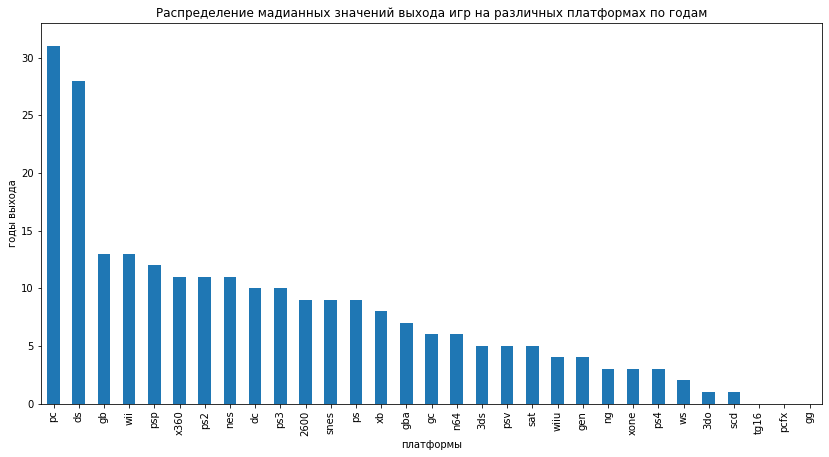

In [126]:
plt.figure()
tablica_platform_long_life.long_life.plot(
    figsize=(14,7)
    ylim=(0,33),
    kind = 'bar',
    title = 'Распределение мадианных значений выхода игр на различных платформах по годам')
plt.xlabel('платформы')
plt.ylabel('годы выхода')
plt.show()

Гистограмма характеристик времени (выхода и закрытия) различных платформ, сгруппированы так же как и на предыдущей гистограмме

<Figure size 432x288 with 0 Axes>

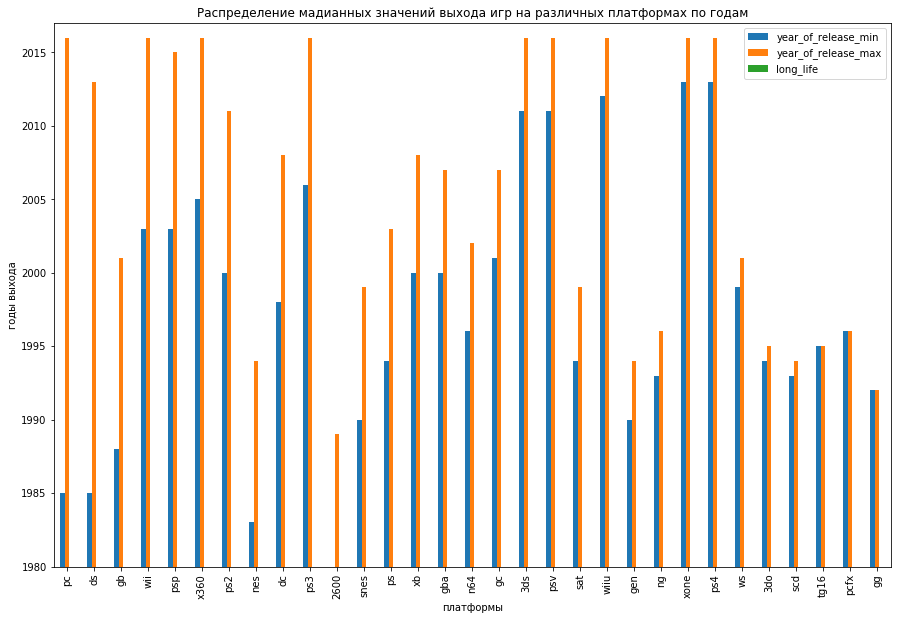

In [127]:
plt.figure()
tablica_platform_long_life.sort_values('long_life',ascending=False).plot(
    figsize=(15,10),
    ylim=(1980,2017),
    kind = 'bar',
    title = 'Распределение мадианных значений выхода игр на различных платформах по годам')
plt.xlabel('платформы')
plt.ylabel('годы выхода')
plt.show()

Исследуем время жизни платформ: pc и ds у нас лидеры, а gg,pcfx, tg16 - аутсайдеры.

платформы с наибольшими суммарными продажами

In [128]:
best_platforms

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
0,x360,971.42,2010,2005.0,2016.0,11.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
2,wii,907.51,2009,2003.0,2016.0,13.0
3,ps4,314.14,2015,2013.0,2016.0,3.0
4,pc,259.52,2010,1985.0,2016.0,31.0
5,3ds,259.00,2013,2011.0,2016.0,5.0
6,xone,159.32,2015,2013.0,2016.0,3.0
7,wiiu,82.19,2013,2012.0,2016.0,4.0
8,psv,54.07,2014,2011.0,2016.0,5.0


Выравним по годам

In [129]:
best_platforms.sort_values(['year_of_release'],ascending=False)

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
3,ps4,314.14,2015,2013.0,2016.0,3.0
6,xone,159.32,2015,2013.0,2016.0,3.0
8,psv,54.07,2014,2011.0,2016.0,5.0
5,3ds,259.00,2013,2011.0,2016.0,5.0
7,wiiu,82.19,2013,2012.0,2016.0,4.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
0,x360,971.42,2010,2005.0,2016.0,11.0
4,pc,259.52,2010,1985.0,2016.0,31.0
2,wii,907.51,2009,2003.0,2016.0,13.0


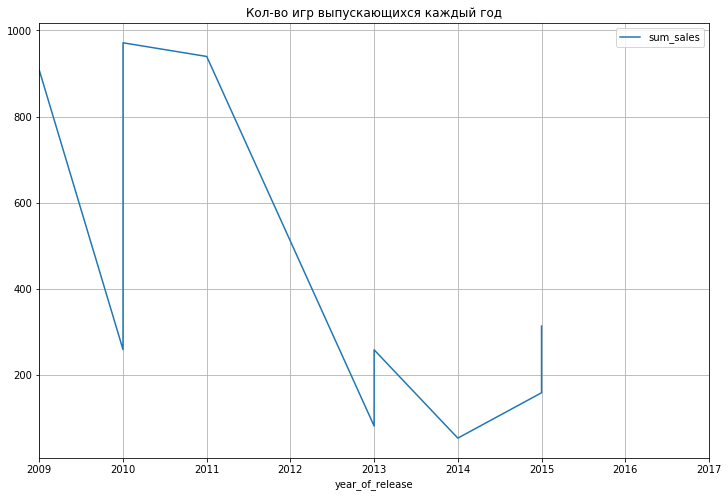

In [130]:
best_platforms.sort_values(['year_of_release'],ascending=False).plot(y='sum_sales',x='year_of_release', style='-', xlim=(2009,2017), grid=True, figsize=(12, 8)).set_title('Кол-во игр выпускающихся каждый год'); 

распределение по медианным годам. Видно что в целом идет спад по прадажам игр. 

In [131]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77


In [132]:
best_platforms

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
0,x360,971.42,2010,2005.0,2016.0,11.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
2,wii,907.51,2009,2003.0,2016.0,13.0
3,ps4,314.14,2015,2013.0,2016.0,3.0
4,pc,259.52,2010,1985.0,2016.0,31.0
5,3ds,259.00,2013,2011.0,2016.0,5.0
6,xone,159.32,2015,2013.0,2016.0,3.0
7,wiiu,82.19,2013,2012.0,2016.0,4.0
8,psv,54.07,2014,2011.0,2016.0,5.0


Создадим датафрейм из наших топовых платформ

In [133]:
best_platforms_df=games.query('platform=="psv"|platform=="3ds"|platform=="xone"|platform=="wiiu"|platform=="x360"|platform=="ps3"|platform=="wii"|platform=="ps4"|platform=="pc"')
best_platforms_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009,28.91
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16503,the longest 5 minutes,psv,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01
16504,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01
16505,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01
16506,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01


In [134]:
table_month_best_platforms_df=best_platforms_df.groupby(['platform','year_of_release']).agg({'sum_sales':'sum'})

table_month_best_platforms_df=table_month_best_platforms_df.reset_index(level=[0,1])
table_month_best_platforms_df

,platform,year_of_release,sum_sales
0,3ds,2011.0,63.20
1,3ds,2012.0,51.36
2,3ds,2013.0,57.76
3,3ds,2014.0,43.76
4,3ds,2015.0,27.78
...,...,...,...
81,x360,2016.0,1.52
82,xone,2013.0,18.96
83,xone,2014.0,54.07
84,xone,2015.0,60.14


In [135]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='x360']

,platform,year_of_release,sum_sales
70,x360,2005.0,8.25
71,x360,2006.0,51.62
72,x360,2007.0,95.41
73,x360,2008.0,135.26
74,x360,2009.0,120.29
75,x360,2010.0,180.21
76,x360,2011.0,143.84
77,x360,2012.0,99.74
78,x360,2013.0,88.58
79,x360,2014.0,34.74


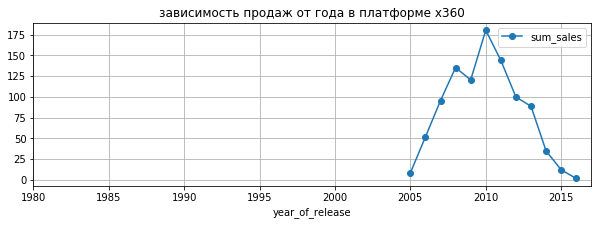

In [136]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='x360'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017), grid=True,title = 'зависимость продаж от года в платформе x360', figsize=(10, 3)); 

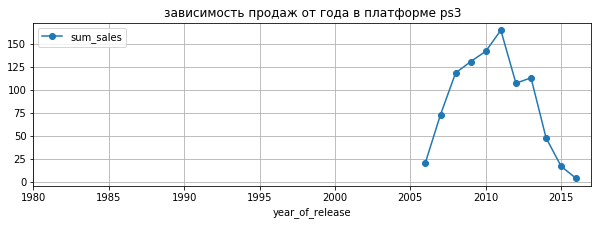

In [137]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='ps3'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе ps3', grid=True, figsize=(10, 3));

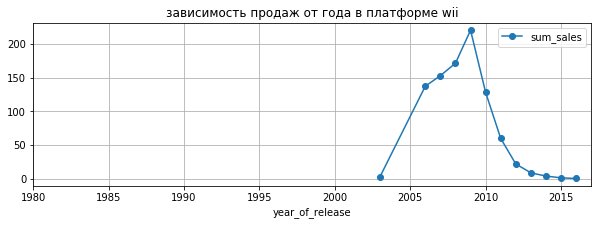

In [138]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='wii'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе wii', grid=True, figsize=(10, 3)); 

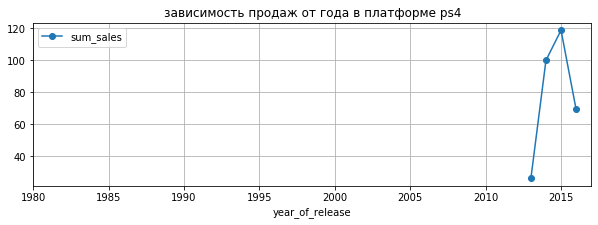

In [139]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='ps4'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе ps4', grid=True, figsize=(10, 3)); 

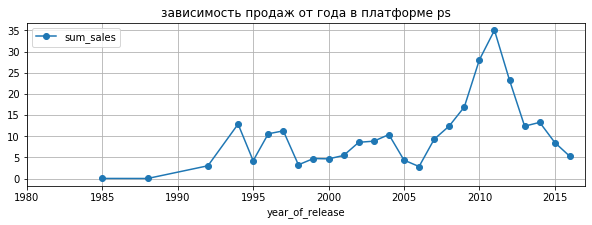

In [140]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='pc'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе ps', grid=True, figsize=(10, 3)); 

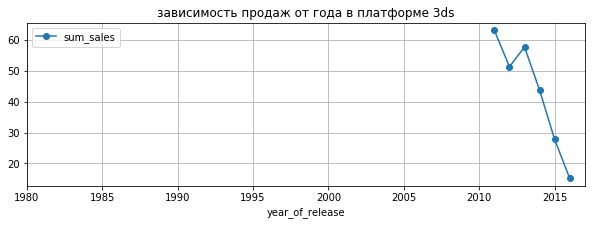

In [141]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='3ds'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе 3ds', grid=True, figsize=(10, 3)); 

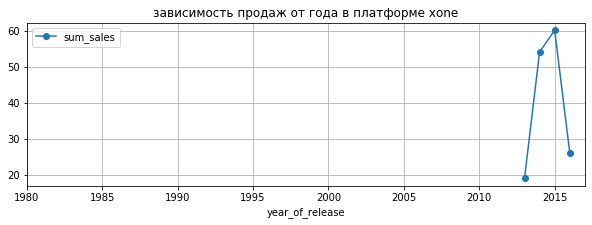

In [142]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='xone'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе xone', grid=True, figsize=(10, 3)); 

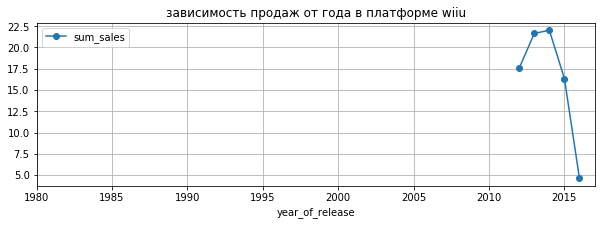

In [143]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='wiiu'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе wiiu', grid=True, figsize=(10, 3)); 

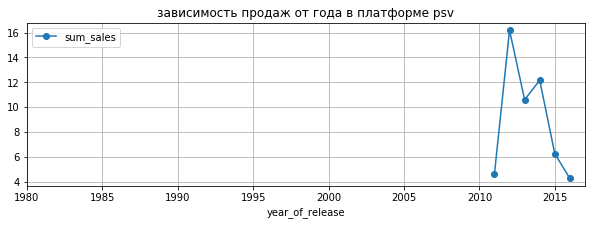

In [144]:
table_month_best_platforms_df[table_month_best_platforms_df['platform']=='psv'].plot(x='year_of_release', y='sum_sales', style='o-', xlim=(1980, 2017),title = 'зависимость продаж от года в платформе psv', grid=True, figsize=(10, 3)); 

Все графики падают к 2016 году. Для дальнейшей работы отберем первые 5 из таблицы best_platforms, т.к. там самые большие суммарные продажи

Cудя по этим даным актуальный период будет начинаться с 2013 года, т.к. в этом году появилась ps4 и xone.

Посмотрим суммарные продажи по годам по нашим выбранным платформам

In [145]:
table_month_best_platforms_df

,platform,year_of_release,sum_sales
0,3ds,2011.0,63.20
1,3ds,2012.0,51.36
2,3ds,2013.0,57.76
3,3ds,2014.0,43.76
4,3ds,2015.0,27.78
...,...,...,...
81,x360,2016.0,1.52
82,xone,2013.0,18.96
83,xone,2014.0,54.07
84,xone,2015.0,60.14


In [146]:
table_month_best_platforms_df.groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index(level=0)

,year_of_release,sum_sales
0,1985.0,0.04
1,1988.0,0.03
2,1992.0,3.03
3,1994.0,12.87
4,1995.0,4.22
5,1996.0,10.58
6,1997.0,11.27
7,1998.0,3.26
8,1999.0,4.74
9,2000.0,4.66


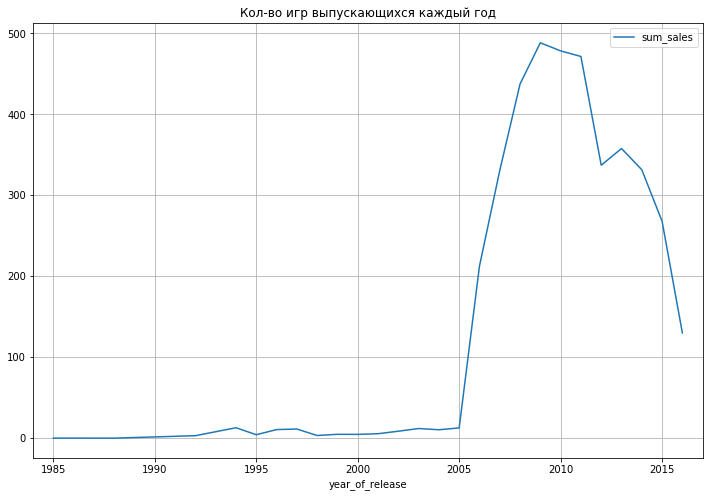

In [147]:
table_month_best_platforms_df.groupby('year_of_release').agg({'sum_sales':'sum'}).reset_index(level=0).plot(y='sum_sales',x='year_of_release', style='-', xlim=(1984,2017), grid=True, figsize=(12, 8)).set_title('Кол-во игр выпускающихся каждый год'); 

Этот график похож на аналогичный, где мы исследовали кол-во игр по годам. Правда там кол-во игр начало рости примерно с 1993 года. А как показывем этот график, на прибыль это увеличение кол-ва игр никак особенно не повлияло. И лишь начиная с 2005 года (спустя долгих 12 лет ) график скачкообразно пошел вверх. Мое предположение, что это связано с выходом на рынок ps3 и x360.

 Выводы: 
 
Медианное значение жизни платформы 6 лет. Среднее: четь меньше 8 лет.

pc и ds у нас лидеры по времени жизни платформ, а gg,pcfx, tg16 - аутсайдеры.

В целом идет спад по прадажам игр.

Все графики продаж падают к 2016 году. Для дальнейшей работы отберем первые 5 из таблицы best_platforms, т.к. там самые большие суммарные продажи.

Cудя по этим даным актуальный период будет начинаться с 2013 года, т.к. в этом году появилась ps4 и xone.


Начиная с 2005 года график продаж скачкообразно пошел вверх. Мое предположение, что это связано с выходом на рынок ps3 и x360.

Отмеченные платформы актуального периода мы и можем назвать перспективными на 2017 год. 


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [148]:
best_platforms

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
0,x360,971.42,2010,2005.0,2016.0,11.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
2,wii,907.51,2009,2003.0,2016.0,13.0
3,ps4,314.14,2015,2013.0,2016.0,3.0
4,pc,259.52,2010,1985.0,2016.0,31.0
5,3ds,259.00,2013,2011.0,2016.0,5.0
6,xone,159.32,2015,2013.0,2016.0,3.0
7,wiiu,82.19,2013,2012.0,2016.0,4.0
8,psv,54.07,2014,2011.0,2016.0,5.0


Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам.

In [149]:
games_boxplot=games[(games['platform']=='x360')
      |(games['platform']=='ps3')
      |(games['platform']=='wii')
      |(games['platform']=='ps4')
      |(games['platform']=='xone')
      |(games['platform']=='wiiu')
      |(games['platform']=='psv')    
     ]
games_boxplot.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009,28.91
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,28.32


Получим диаграмму размаха для каждой платформы по ее продажам

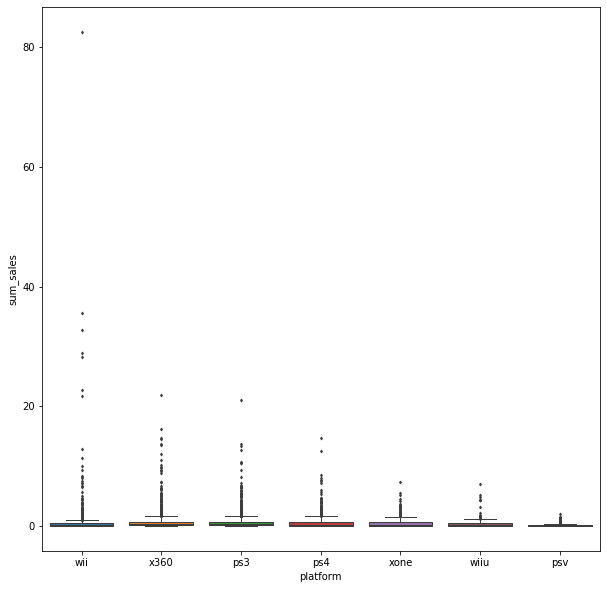

In [150]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='platform',y='sum_sales',data=games_boxplot,linewidth=1,fliersize=2)
plt.show()

Обратим внимание что наибольшие по значению выбросы у платформы wii. Параметры всех платформ по продажам примерно похожи.

In [151]:
best_platforms[['sum_sales']].describe()

,sum_sales
count,9.000000
mean,438.535556
std,385.280682
min,54.070000
25%,159.320000
50%,259.520000
75%,907.510000
max,971.420000


In [152]:
best_of_the_best_platforms=best_platforms.head(5)
best_of_the_best_platforms

,platform,sum_sales,year_of_release,year_of_release_min,year_of_release_max,long_life
0,x360,971.42,2010,2005.0,2016.0,11.0
1,ps3,939.65,2011,2006.0,2016.0,10.0
2,wii,907.51,2009,2003.0,2016.0,13.0
3,ps4,314.14,2015,2013.0,2016.0,3.0
4,pc,259.52,2010,1985.0,2016.0,31.0


Вывод:

Проанализировав данные продаж по 7 платформам, мы видим, что среднее значение = 438, медианное = 260! Большая разница свидетельствует о наличии выбросов! Видим что последние 4 платформы в списке имеют очень низкие показатели. Создадим новую группу best_of_the_best_platforms из первых 5 платформ: x360, ps3, wii, ps4, pc

In [153]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009,28.91
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,policenauts,3do,1995.0,adventure,0.00,0.00,0.06,0.00,NaN,NaN,unknown,1995,0.06
16708,bust-a-move,3do,1994.0,puzzle,0.00,0.00,0.02,0.00,NaN,NaN,unknown,1995,0.02
16709,sotsugyou ii: neo generation special,3do,1995.0,simulation,0.00,0.00,0.02,0.00,NaN,NaN,unknown,1995,0.02
16710,sonic the hedgehog 2 (8-bit),gg,1992.0,platform,0.00,0.00,0.04,0.00,NaN,NaN,unknown,1992,0.04


### Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Выберем в качестве популярной платформы 'x360'

Для удобства рисования графиков в одном окне приведем значение user_score к critic_score по порядкам (умножим на 10)

In [154]:
pd.options.mode.chained_assignment = None

In [156]:
best_platforms_df.loc[(best_platforms_df.loc[:,'user_score'].isnull()==False),'user_score']=best_platforms_df.loc[(best_platforms_df.loc[:,'user_score'].isnull()==False),'user_score']*10

In [157]:
best_platforms_df[best_platforms_df['platform']=='x360']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
3667,kinect adventures!,x360,2010.0,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,2010,21.82
3668,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,81.0,M,2010,16.27
3669,call of duty: modern warfare 3,x360,2011.0,shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,2010,14.73
3670,call of duty: black ops,x360,2010.0,shooter,9.70,3.68,0.11,1.13,87.0,63.0,M,2010,14.62
3671,call of duty: black ops ii,x360,2012.0,shooter,8.25,4.24,0.07,1.12,83.0,48.0,M,2010,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,dragon ball z for kinect,x360,2012.0,fighting,0.01,0.00,0.00,0.00,49.0,21.0,T,2010,0.01
4925,world snooker championship 2007,x360,2007.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,E,2010,0.01
4926,metal gear solid hd edition,x360,2011.0,action,0.00,0.00,0.01,0.00,NaN,10.0,M,2010,0.01
4927,ben 10 omniverse 2,x360,2013.0,action,0.00,0.01,0.00,0.00,NaN,51.0,E10+,2010,0.01


Рассмотрим оценки критиков

Сгруппируем отзывы пользователей по суммам продаж и построим по этой таблице график

In [158]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('user_score').agg({'sum_sales':'sum'})


,sum_sales
user_score,
7.0,0.18
10.0,12.58
12.0,0.10
13.0,0.19
17.0,0.42
...,...
86.0,14.71
87.0,18.31
88.0,7.43


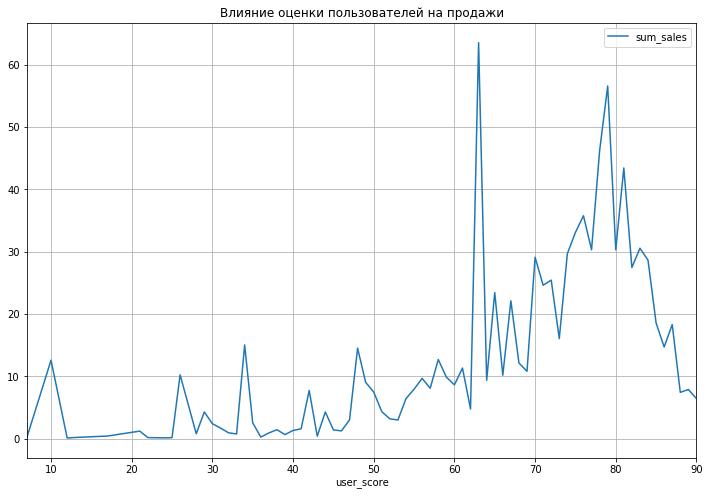

In [159]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('user_score').agg({'sum_sales':'sum'}).plot( style='-', grid=True, figsize=(12, 8)).set_title('Влияние оценки пользователей на продажи'); 

In [160]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('user_score').agg({'sum_sales':'median'})


,sum_sales
user_score,
7.0,0.180
10.0,0.110
12.0,0.100
13.0,0.095
17.0,0.210
...,...
86.0,0.370
87.0,0.930
88.0,0.260


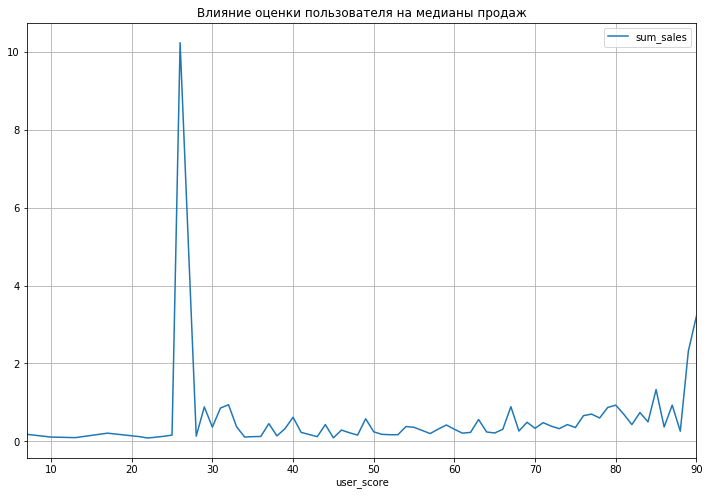

In [161]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('user_score').agg({'sum_sales':'median'}).plot( style='-', grid=True, figsize=(12, 8)).set_title('Влияние оценки пользователя на медианы продаж'); 

Вывод:

Из графика видно, что большая часть прибыли с продаж людьми не была оценена (значение 0=user_score). Максимальное значение при user_score = 6.3. Видно что (начиная с user_score = 5 и до 8) при росте user_score ростет и sum_sales. После user_score = 8, несмотря на рост рейтинга, кривая продаж идет вниз.

Медианные показатели продаж не зависят от рейтинга пользователей.

Рассмотрим оценки критиков

In [162]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('critic_score').agg({'sum_sales':'sum'})

,sum_sales
critic_score,
19.0,0.06
21.0,0.12
25.0,0.37
26.0,0.46
28.0,0.22
...,...
94.0,50.10
95.0,8.40
96.0,16.53


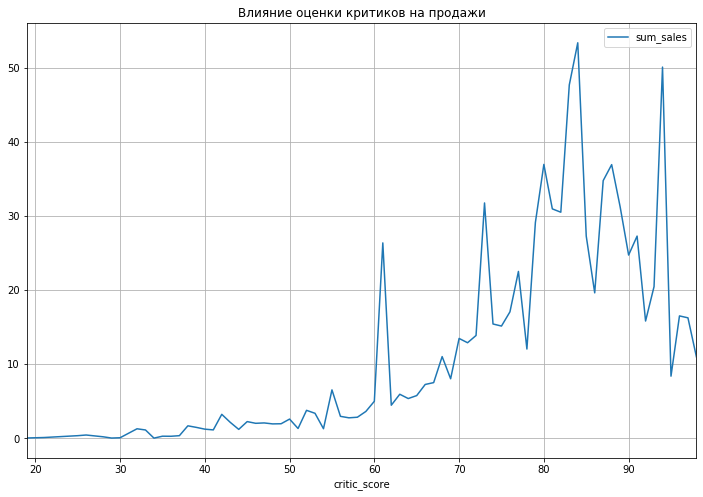

In [163]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('critic_score').agg({'sum_sales':'sum'}).plot( style='-', grid=True, figsize=(12, 8)).set_title('Влияние оценки критиков на продажи'); 

In [164]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('critic_score').agg({'sum_sales':'median'})

,sum_sales
critic_score,
19.0,0.060
21.0,0.120
25.0,0.185
26.0,0.230
28.0,0.110
...,...
94.0,7.705
95.0,4.200
96.0,2.965


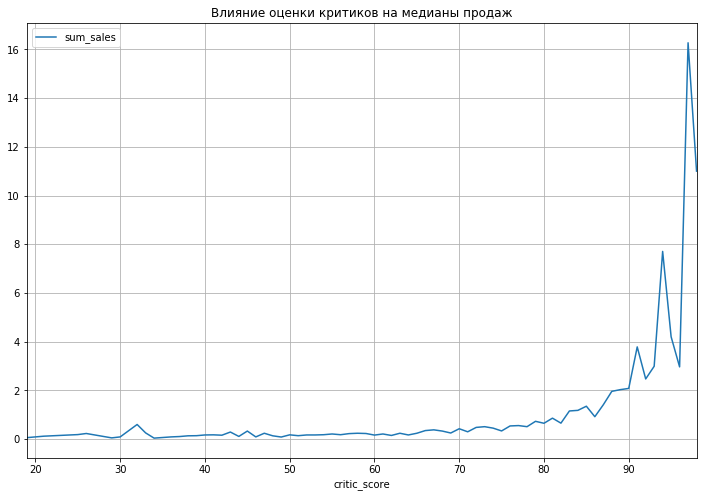

In [165]:
best_platforms_df[best_platforms_df['platform']=='x360'].groupby('critic_score').agg({'sum_sales':'median'}).plot( style='-', grid=True, figsize=(12, 8)).set_title('Влияние оценки критиков на медианы продаж'); 

Вывод: 

Из графика видно, что большая часть прибыли с продаж людьми не была оценена (значение 0=critic_score). Видно что (начиная с critic_score = 60 и до 90) при росте critic_score ростет и sum_sales. После critic_score = 90, несмотря на рост рейтинга, кривая продаж идет вниз.

Медианные показатели продаж сильно зависят от рейтинга критиков, после оценки 80.

объединим оба графика в одном окне для наглядности и компактности

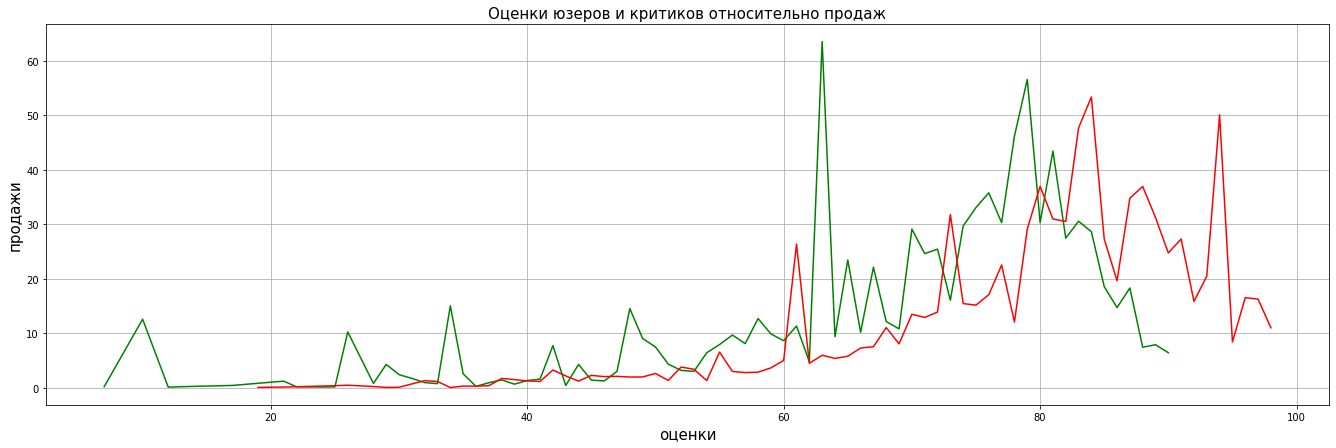

In [166]:
fig, ax = plt.subplots()

ax.plot(best_platforms_df[best_platforms_df['platform']=='x360'].groupby('user_score').agg({'sum_sales':'sum'}) , color='green')
ax.plot(best_platforms_df[best_platforms_df['platform']=='x360'].groupby('critic_score').agg({'sum_sales':'sum'}) , color='red')


ax.set_title('Оценки юзеров и критиков относительно продаж',fontsize = 15)
ax.grid()
ax.set_xlabel('оценки',fontsize = 15)
ax.set_ylabel('продажи',fontsize = 15)

fig.set_figwidth(23)
fig.set_figheight(7)

plt.show()

### Подсчитаем корреляцию

In [167]:
best_platforms_df[['user_score','sum_sales']]

,user_score,sum_sales
0,80.0,82.54
1,83.0,35.52
2,80.0,32.77
3,66.0,28.91
4,84.0,28.32
...,...,...
16503,NaN,0.01
16504,NaN,0.01
16505,NaN,0.01
16506,NaN,0.01


In [168]:
best_platforms_df[best_platforms_df['platform']=='x360']['user_score'].corr(best_platforms_df[best_platforms_df['platform']=='x360']['sum_sales'])

0.16745213547116608

Низкий уровень корреляции

In [169]:
best_platforms_df[best_platforms_df['platform']=='x360']['critic_score'].corr(best_platforms_df[best_platforms_df['platform']=='x360']['sum_sales'])

0.3937358653072588

слабый уровень корреляции

Выводы: Уровень корреляции между отзывами пользователей и критиков с продажами достаточно слабый

### Соотнесите выводы с продажами игр на других платформах.

Создадим цикл, который будет гонять уникальные значения платформ и строить по ним графики и вычислять корреляции

wii


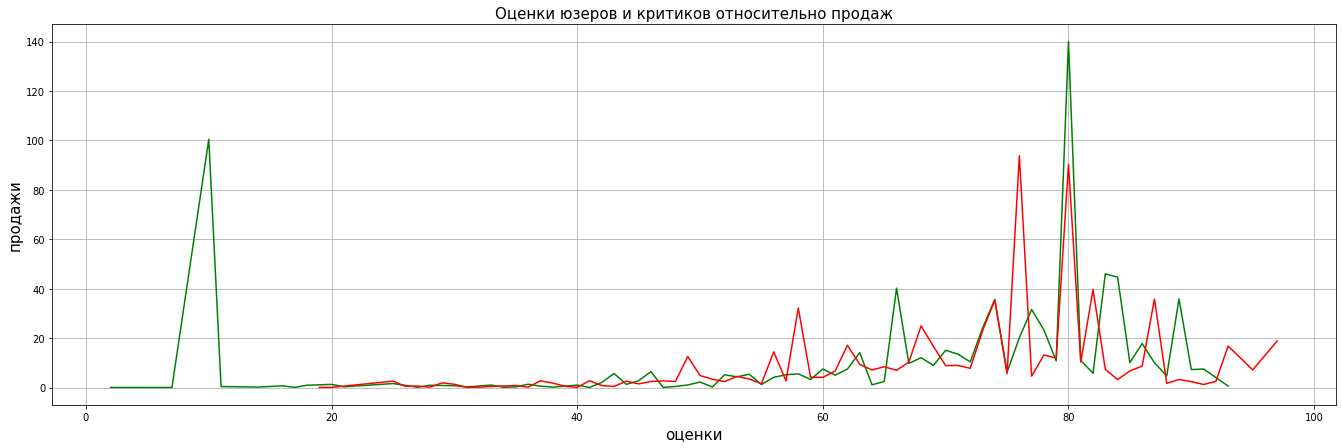

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.178
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.178
x360


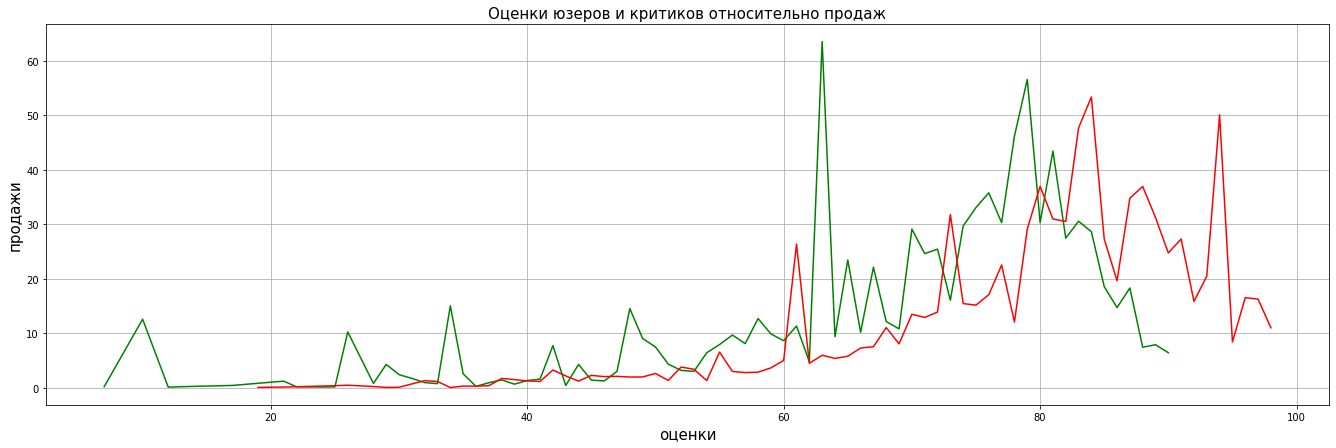

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.167
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.394
ps3


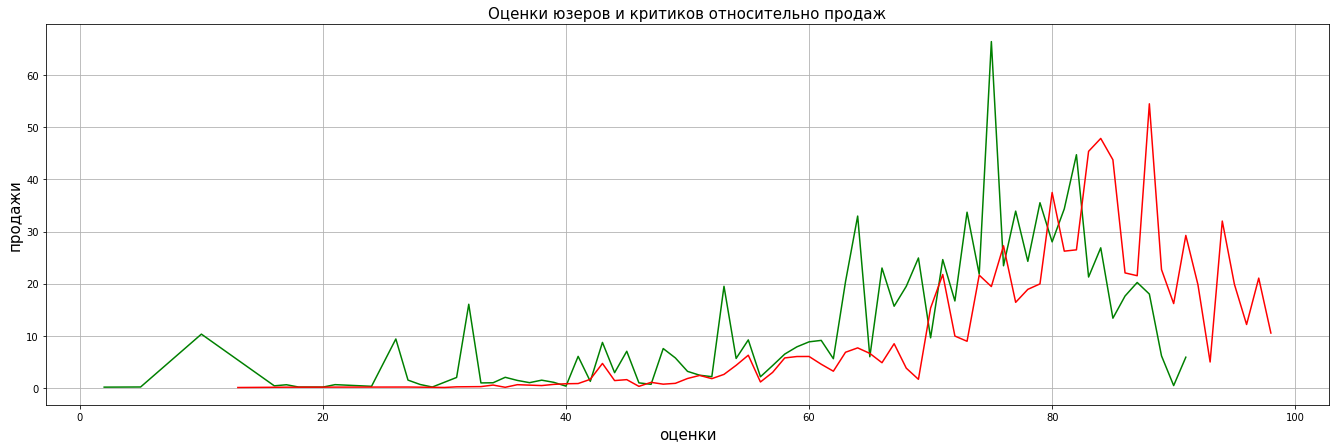

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.198
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.432
ps4


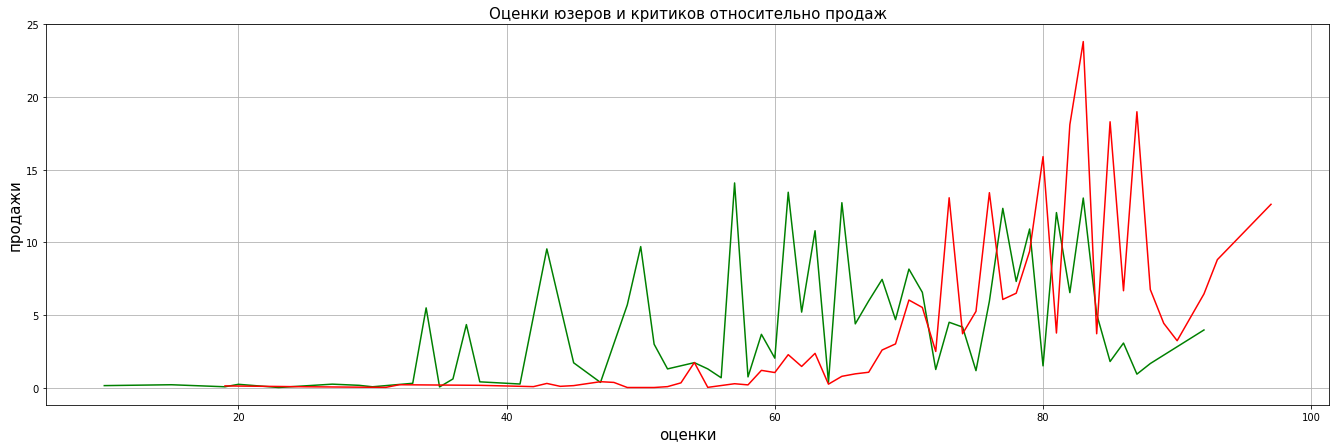

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.017
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.407
3ds


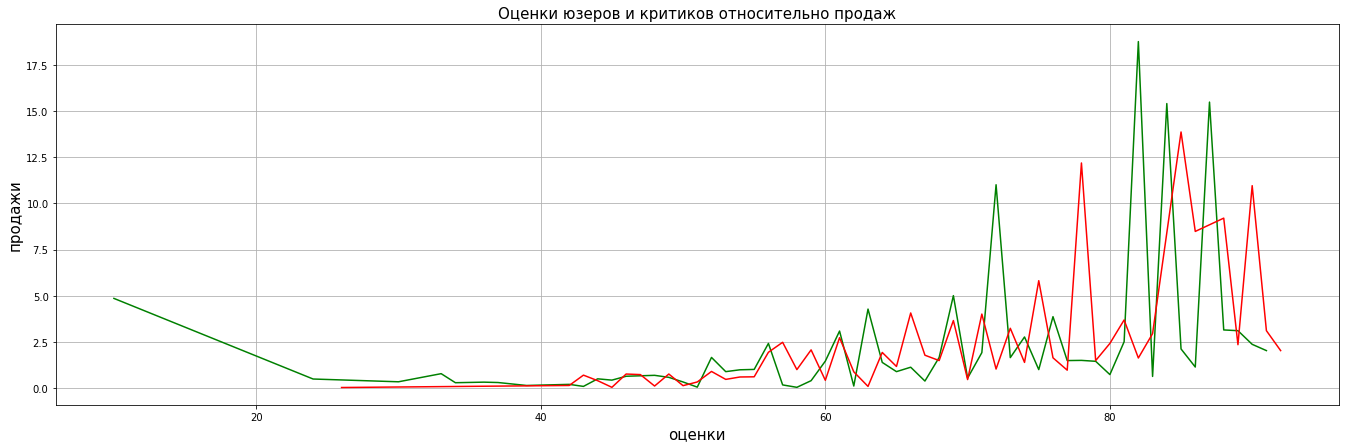

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.266
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.349
pc


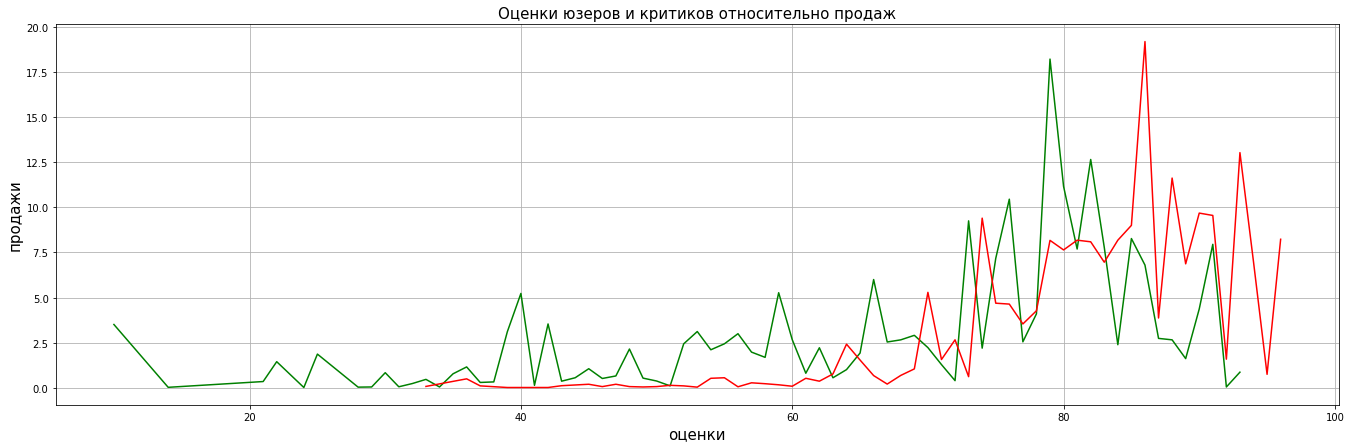

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.057
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.257
xone


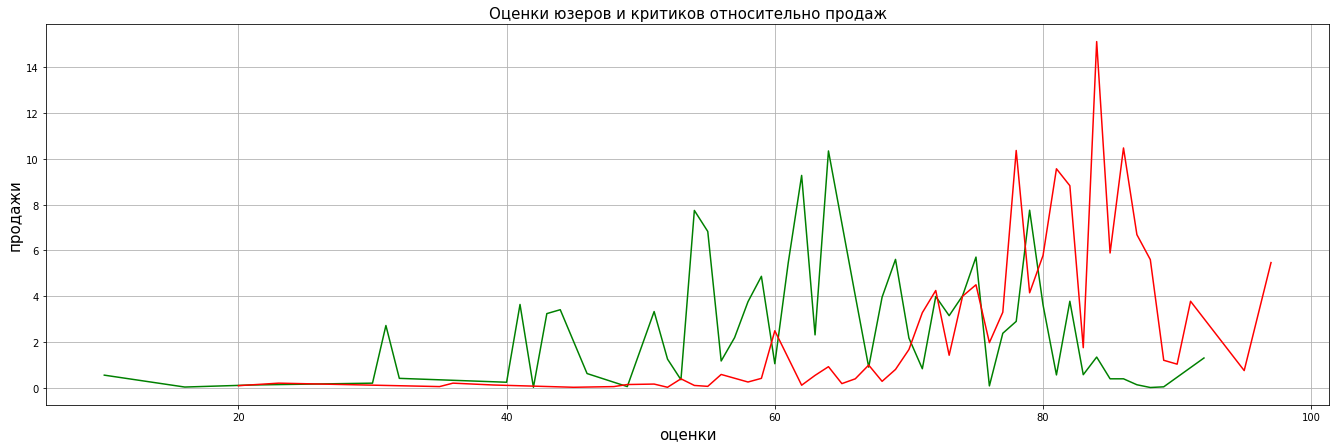

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.061
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.417
wiiu


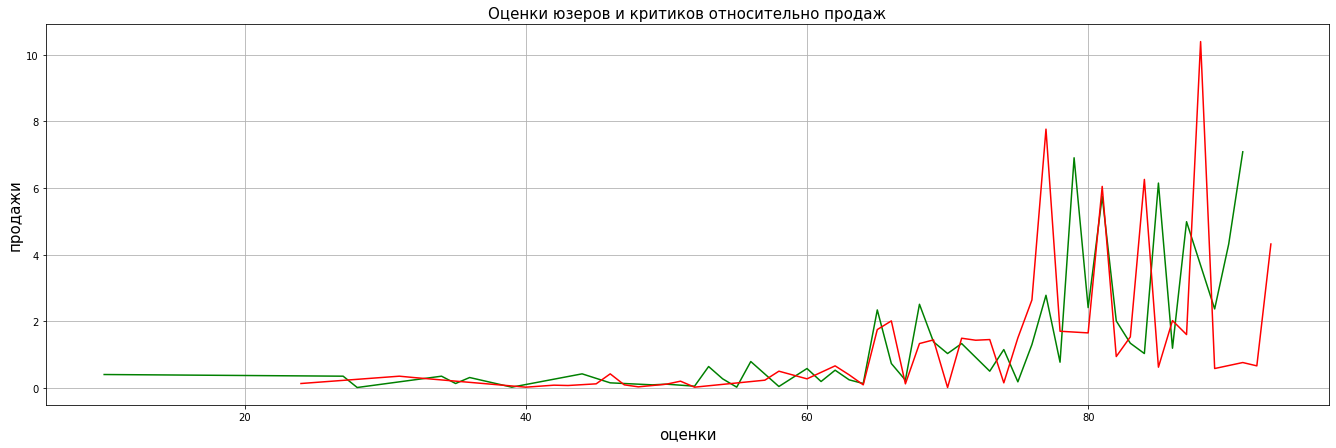

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.370
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.348
psv


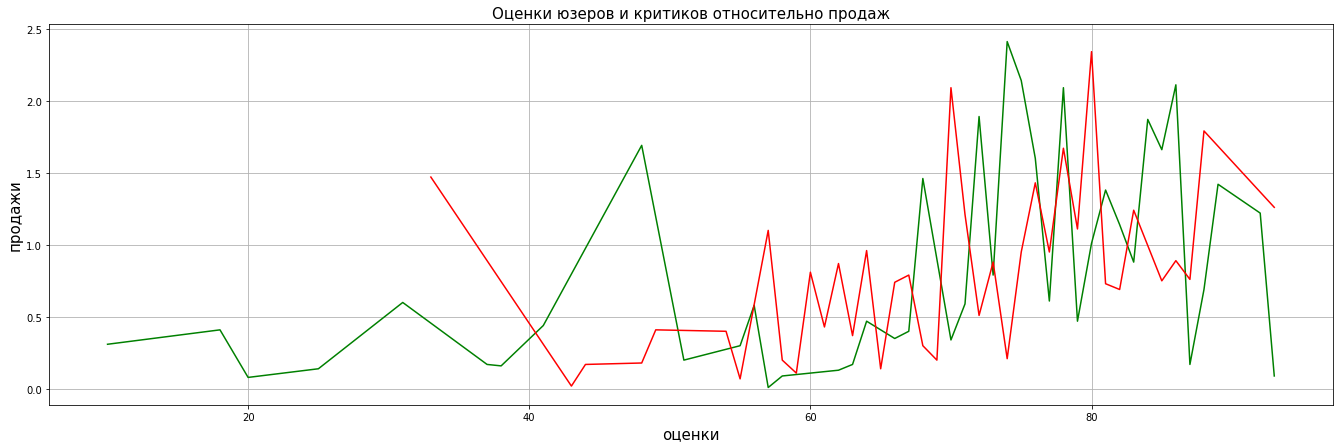

Корреляция пользователей
Коэффициент корреляции между оценкой юзеров и продажами 0.119
Корреляция экспертов
Коэффициент корреляции между оценкой критиков и продажами 0.132


In [170]:
for i in best_platforms_df['platform'].unique():
    print(i)
    fig, ax = plt.subplots()

    ax.plot(best_platforms_df[best_platforms_df['platform']==i].groupby('user_score').agg({'sum_sales':'sum'}) , color='green')
    ax.plot(best_platforms_df[best_platforms_df['platform']==i].groupby('critic_score').agg({'sum_sales':'sum'}) , color='red')

    ax.set_title('Оценки юзеров и критиков относительно продаж',fontsize = 15)
    ax.grid()
    ax.set_xlabel('оценки',fontsize = 15)
    ax.set_ylabel('продажи',fontsize = 15)

    fig.set_figwidth(23)
    fig.set_figheight(7)

    plt.show()
    
    print('Корреляция пользователей')
    cor_users=best_platforms_df[best_platforms_df['platform']==i]['user_score'].corr(best_platforms_df[best_platforms_df['platform']==i]['sum_sales'])
    print('Коэффициент корреляции между оценкой юзеров и продажами {:.3f}'.format(cor_users))
    
    print('Корреляция экспертов')
    cor_critic=best_platforms_df[best_platforms_df['platform']==i]['critic_score'].corr(best_platforms_df[best_platforms_df['platform']==i]['sum_sales'])
    print('Коэффициент корреляции между оценкой критиков и продажами {:.3f}'.format(cor_critic))

Выводы: 


 - Платформа Wii: 
     - коэф. корреляции оценкой юзеров и продажами 0.178
     - коэф. корреляции оценкой критиков и продажами 0.178
 
 - Платформа x360:
     - коэф. корреляции оценкой юзеров и продажами 0.167
     - коэф. корреляции оценкой критиков и продажами 0.394
 
 - Платформа ps3:
     - коэф. корреляции оценкой юзеров и продажами 0.198
     - коэф. корреляции оценкой критиков и продажами 0.432
 
 - Платформа ps4:
     - коэф. корреляции оценкой юзеров и продажами 0.017
     - коэф. корреляции оценкой критиков и продажами 0.407
 
 - Платформа 3ds:
     - коэф. корреляции оценкой юзеров и продажами 0.266
     - коэф. корреляции оценкой критиков и продажами  0.349
 
 - Платформа ps:
     - коэф. корреляции оценкой юзеров и продажами 0.057
     - коэф. корреляции оценкой критиков и продажами 0.257
 
 - Платформа xone:
     - коэф. корреляции оценкой юзеров и продажами 0.061
     - коэф. корреляции оценкой критиков и продажами 0.417
 
 - Платформа wiiu:
     - коэф. корреляции оценкой юзеров и продажами 0.370
     - коэф. корреляции оценкой критиков и продажами 0.348
 
 - Платформа psv:
     - коэф. корреляции оценкой юзеров и продажами 0.119
     - коэф. корреляции оценкой критиков и продажами 0.132



В целом, оценки критиков сильнее коррелируют с продажами, чем оценки пользователей.

### Проанализируем общее распределение игр по жанрам.

In [171]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52


In [172]:
tabl_genre_sum_sales=games.groupby('genre').agg({'sum_sales':'sum'}).sort_values('sum_sales',ascending=False)
tabl_genre_sum_sales=tabl_genre_sum_sales.reset_index()
tabl_genre_sum_sales

,genre,sum_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,444.53
8,simulation,389.97
9,puzzle,242.57


In [173]:
tablica_mean_genre=tablica_mean_genre.reset_index()
tablica_mean_genre

,genre,count_rating,procent
0,action,2188,21.992160
1,sports,1509,15.167354
2,shooter,1019,10.242235
3,misc,882,8.865213
4,racing,872,8.764700
5,role-playing,777,7.809830
6,platform,569,5.719168
7,simulation,568,5.709116
8,adventure,446,4.482863
9,fighting,438,4.402453


In [174]:
tabl_genre_sum_sales=tabl_genre_sum_sales.merge(tablica_mean_genre,on='genre', how='outer')
tabl_genre_sum_sales['sum_sales_udelnaia']=tabl_genre_sum_sales['sum_sales']/tabl_genre_sum_sales['count_rating']
tabl_genre_sum_sales=tabl_genre_sum_sales.sort_values('sum_sales_udelnaia',ascending=False)
tabl_genre_sum_sales

,genre,sum_sales,count_rating,procent,sum_sales_udelnaia
4,platform,827.77,569,5.719168,1.454780
3,role-playing,934.56,777,7.809830,1.202780
2,shooter,1052.45,1019,10.242235,1.032826
7,fighting,444.53,438,4.402453,1.014909
5,misc,802.51,882,8.865213,0.909875
1,sports,1331.27,1509,15.167354,0.882220
6,racing,728.67,872,8.764700,0.835631
0,action,1744.17,2188,21.992160,0.797153
9,puzzle,242.57,342,3.437531,0.709269
8,simulation,389.97,568,5.709116,0.686567


In [175]:
tabl_genre_sum_sales=tabl_genre_sum_sales.set_index('genre')

In [176]:
tabl_genre_sum_sales

,sum_sales,count_rating,procent,sum_sales_udelnaia
genre,,,,
platform,827.77,569,5.719168,1.454780
role-playing,934.56,777,7.809830,1.202780
shooter,1052.45,1019,10.242235,1.032826
fighting,444.53,438,4.402453,1.014909
misc,802.51,882,8.865213,0.909875
sports,1331.27,1509,15.167354,0.882220
racing,728.67,872,8.764700,0.835631
action,1744.17,2188,21.992160,0.797153
puzzle,242.57,342,3.437531,0.709269


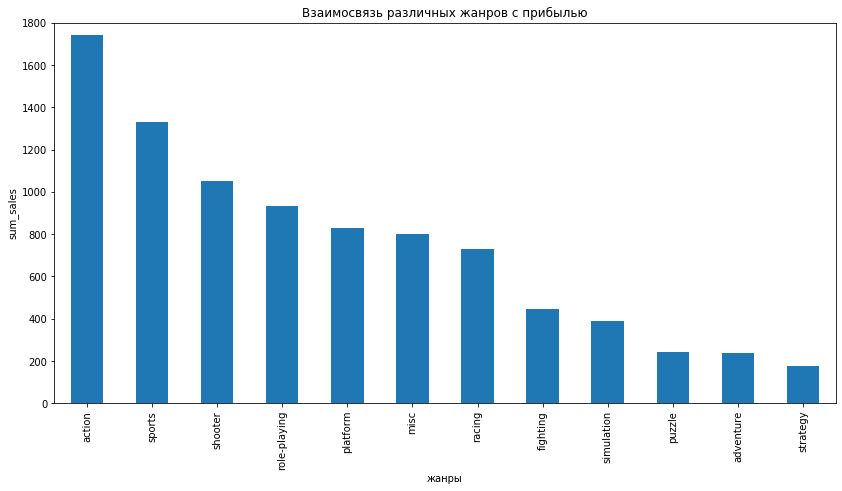

In [177]:
games_genre=games.pivot_table(index=['genre'], values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending=False)

plt.figure()
games_genre.sum_sales.plot(figsize=(14,7),ylim=(0,1800),kind = 'bar', title = 'Взаимосвязь различных жанров с прибылью')
plt.xlabel('жанры')
plt.ylabel('sum_sales')
plt.show()

Выводы: самый прибыльный жанр, ПО АБСОЛЮТНЫМ ПОКАЗАТЕЛЯМ, в нашей выборке - action

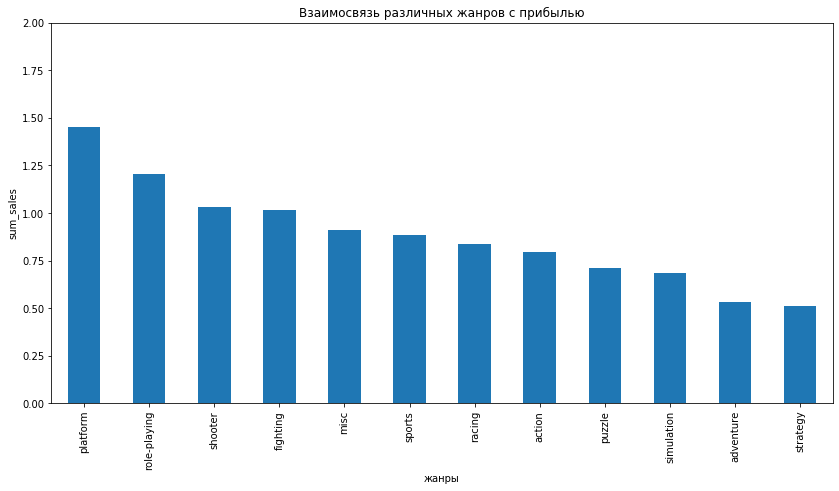

In [178]:
plt.figure()
tabl_genre_sum_sales.sum_sales_udelnaia.plot(figsize=(14,7),ylim=(0,2),kind = 'bar', title = 'Взаимосвязь различных жанров с прибылью')
plt.xlabel('жанры')
plt.ylabel('sum_sales')
plt.show()

по удельным характеристикам прибыли (суммарная прибыли/суммарное кол-во по жанру) у нас лидирует platform

## Составим портрет пользователя каждого региона. 

Выделим пользователей 

In [179]:
games.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2009,82.54
1,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2009,35.52
2,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
3,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2009,28.91
4,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,28.32
5,wii fit,wii,2007.0,sports,8.92,8.03,3.60,2.15,80.0,7.7,E,2009,22.70
6,wii fit plus,wii,2009.0,sports,9.01,8.49,2.53,1.77,80.0,7.4,E,2009,21.80


### Самые популярные платформы (топ-5)

#### Посмотрим на продажи по платформам в Северной Америке

In [180]:
table_na_sales_platform=games.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
table_na_sales_platform

,na_sales
platform,
x360,602.47
ps2,582.27
wii,496.90
ps3,393.49
ds,382.40
ps,336.52
gba,187.54
xb,186.69
n64,139.02


<Figure size 432x288 with 0 Axes>

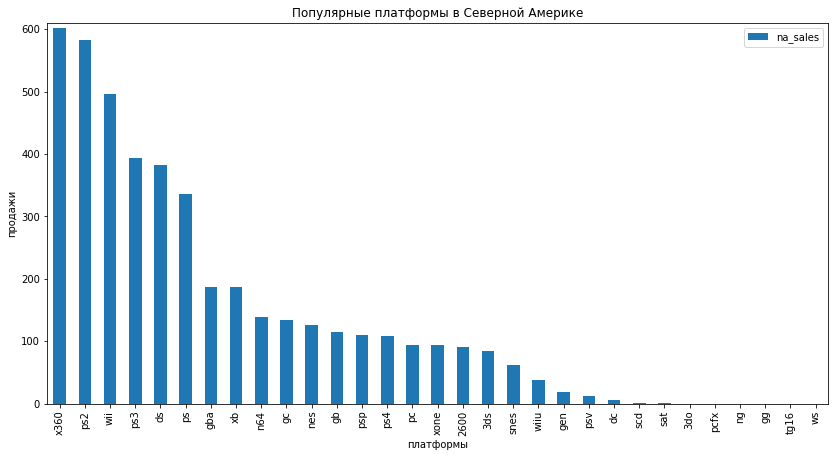

In [181]:
plt.figure();
table_na_sales_platform.plot(figsize=(14,7),ylim=(0,610),kind = 'bar', title = 'Популярные платформы в Северной Америке');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

In [182]:
top_table_na_sales_platform=table_na_sales_platform.head(5)
top_table_na_sales_platform

,na_sales
platform,
x360,602.47
ps2,582.27
wii,496.90
ps3,393.49
ds,382.40


Вывод: Топ 5 самых популярных платформ в Северной америке является х360, ps2, wii, ps3, ds

#### Посмотрим на продажи по платформам в Европе

In [183]:
table_eu_sales_platform=games.groupby('platform').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
table_eu_sales_platform

,eu_sales
platform,
ps2,338.27
ps3,330.29
x360,270.76
wii,262.21
ps,213.61
ds,188.89
pc,142.44
ps4,141.09
gba,75.25


<Figure size 432x288 with 0 Axes>

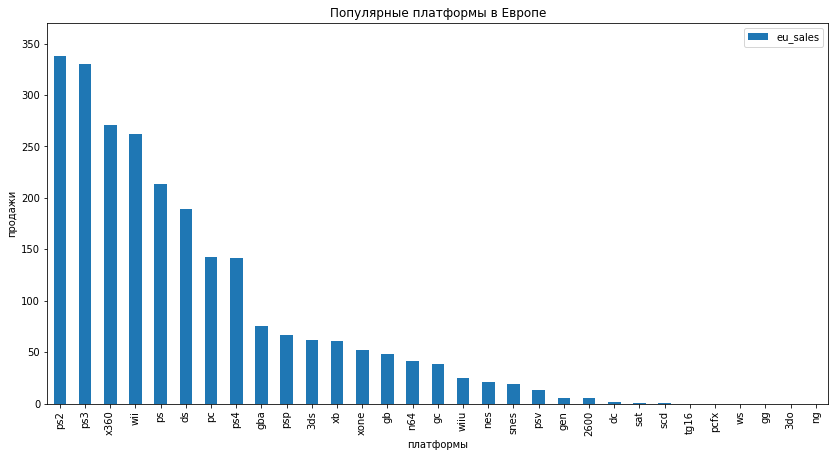

In [184]:
plt.figure();
table_eu_sales_platform.plot(figsize=(14,7),ylim=(0,370),kind = 'bar', title = 'Популярные платформы в Европе');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

In [185]:
top_table_eu_sales_platform=table_na_sales_platform.head(5)
top_table_eu_sales_platform

,na_sales
platform,
x360,602.47
ps2,582.27
wii,496.90
ps3,393.49
ds,382.40


Вывод: Топ 5 самых популярных платформ в Европе является х360, ps2, wii, ps3, ds

#### Посмотрим на продажи по платформам в Японии

In [186]:
table_jp_sales_platform=games.groupby('platform').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
table_jp_sales_platform

,jp_sales
platform,
ds,175.57
ps,139.82
ps2,139.20
snes,116.55
3ds,100.67
nes,98.65
gb,85.12
ps3,80.19
psp,76.78


<Figure size 432x288 with 0 Axes>

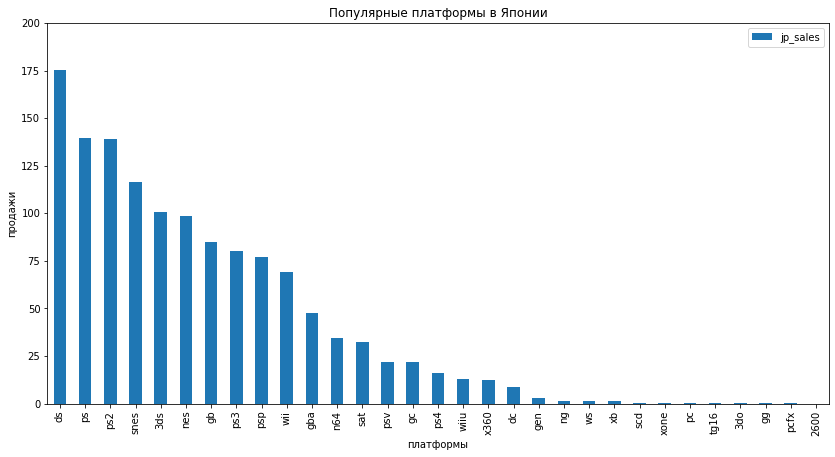

In [187]:
plt.figure();
table_jp_sales_platform.plot(figsize=(14,7),ylim=(0,200),kind = 'bar', title = 'Популярные платформы в Японии');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

In [188]:
top_table_jp_sales_platform=table_na_sales_platform.head(5)
top_table_jp_sales_platform

,na_sales
platform,
x360,602.47
ps2,582.27
wii,496.90
ps3,393.49
ds,382.40


Вывод: Топ 5 самых популярных платформ в Японии является х360, ps2, wii, ps3, ds

Сгруппируем все продажи по всем регионам

In [189]:
table_oll_sales_platform=games[['platform','na_sales','eu_sales','jp_sales']].groupby('platform').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
table_oll_sales_platform

,na_sales,eu_sales,jp_sales
platform,,,
2600,90.60,5.47,0.00
3do,0.00,0.00,0.10
3ds,83.49,61.48,100.67
dc,5.43,1.69,8.56
ds,382.40,188.89,175.57
gb,114.32,47.82,85.12
gba,187.54,75.25,47.33
gc,133.46,38.71,21.58
gen,19.27,5.52,2.67


<Figure size 432x288 with 0 Axes>

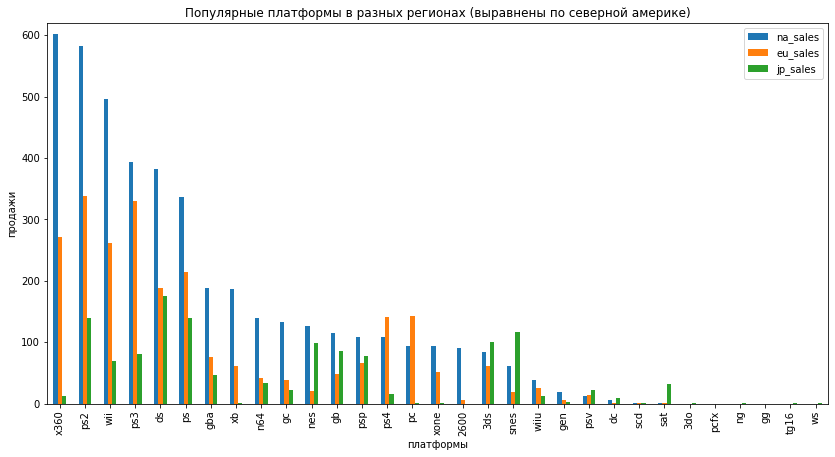

In [190]:
plt.figure();


table_oll_sales_platform.sort_values('na_sales', ascending=False).plot(figsize=(14,7),ylim=(0,620),kind = 'bar', title = 'Популярные платформы в разных регионах (выравнены по северной америке)');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

<Figure size 432x288 with 0 Axes>

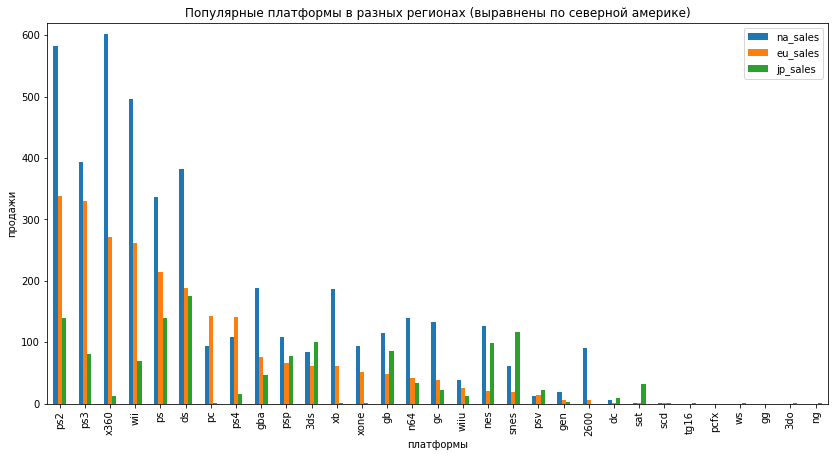

In [191]:
plt.figure();


table_oll_sales_platform.sort_values('eu_sales', ascending=False).plot(figsize=(14,7),ylim=(0,620),kind = 'bar', title = 'Популярные платформы в разных регионах (выравнены по северной америке)');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

<Figure size 432x288 with 0 Axes>

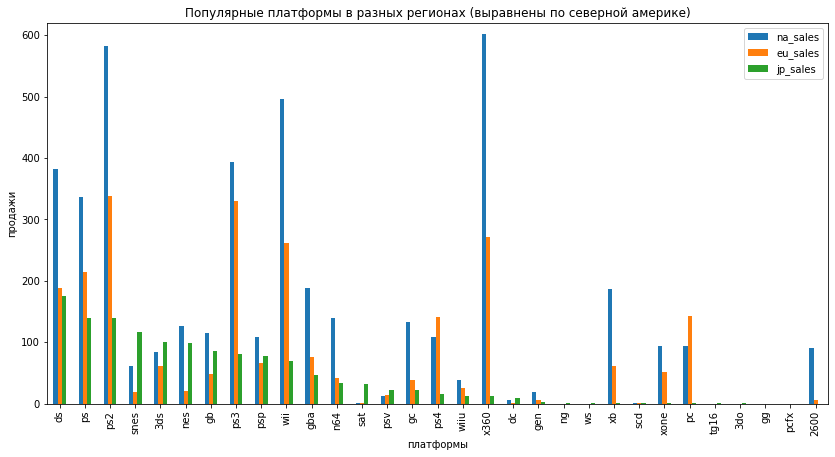

In [192]:
plt.figure();


table_oll_sales_platform.sort_values('jp_sales', ascending=False).plot(figsize=(14,7),ylim=(0,620),kind = 'bar', title = 'Популярные платформы в разных регионах (выравнены по северной америке)');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

Для лучшей наглядности посмотрим на все плтформы всех регионов на одной гистограмме

Вычислим суммарное кол-во продаж по этим трем регионам

In [193]:
sum_table_oll_sales_platform=(table_oll_sales_platform['na_sales'].sum()+
                              table_oll_sales_platform['eu_sales'].sum()+
                              table_oll_sales_platform['jp_sales'].sum())
sum_table_oll_sales_platform

8119.459999999978

Вычислим какую долю занимают продажи по регионам:

In [194]:
table_oll_sales_platform['na_sales'].sum() / sum_table_oll_sales_platform * 100

54.178479849645164

In [195]:
table_oll_sales_platform['eu_sales'].sum() / sum_table_oll_sales_platform * 100

29.843363967554453

In [196]:
table_oll_sales_platform['jp_sales'].sum() / sum_table_oll_sales_platform * 100

15.978156182800394

Вывод: 

Топ 5 самых популярных платформ во всех трех регионах являются х360, ps2, wii, ps3, ds

54% - доля северной америки, 30% - доля европы, 16% - доля японии

### Самые популярные жанры (топ-5)

#### Посмотрим на продажи по жанрам в Северной Америке

In [197]:
table_na_sales_genre=games.groupby('genre').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False)
table_na_sales_genre

,na_sales
genre,
action,879.01
sports,684.43
shooter,592.24
platform,445.50
misc,407.27
racing,359.35
role-playing,330.81
fighting,221.79
simulation,181.92


<Figure size 432x288 with 0 Axes>

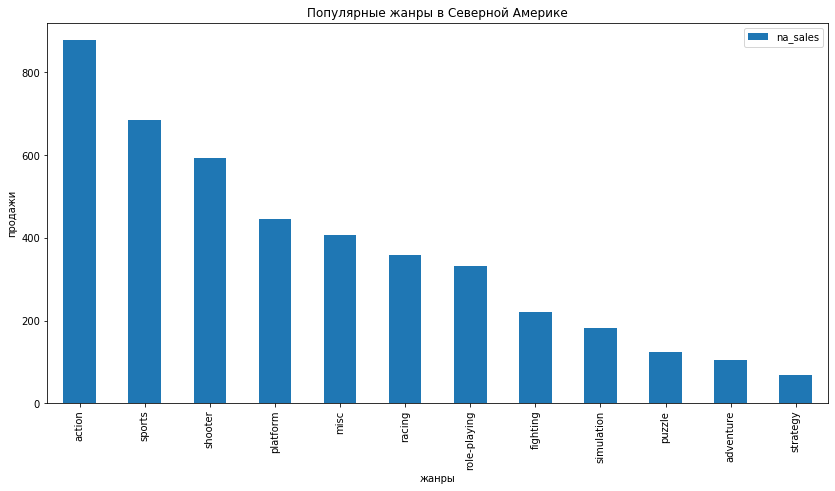

In [198]:
plt.figure();
table_na_sales_genre.plot(figsize=(14,7),
                          ylim=(0,920),
                          kind = 'bar',
                          title = 'Популярные жанры в Северной Америке');
plt.xlabel('жанры');
plt.ylabel('продажи');
plt.show();

In [199]:
top_table_na_sales_genre=table_na_sales_genre.head(5)
top_table_na_sales_genre

,na_sales
genre,
action,879.01
sports,684.43
shooter,592.24
platform,445.50
misc,407.27


Вывод: Топ-5 популярных жанров в Америке: action, sports, shooter, platform, misc

#### Посмотрим на продажи по жанрам в Европе

In [200]:
table_eu_sales_genre=games.groupby('genre').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False)
table_eu_sales_genre

,eu_sales
genre,
action,519.13
sports,376.79
shooter,317.34
racing,236.51
misc,212.74
platform,200.35
role-playing,188.71
simulation,113.52
fighting,99.31


<Figure size 432x288 with 0 Axes>

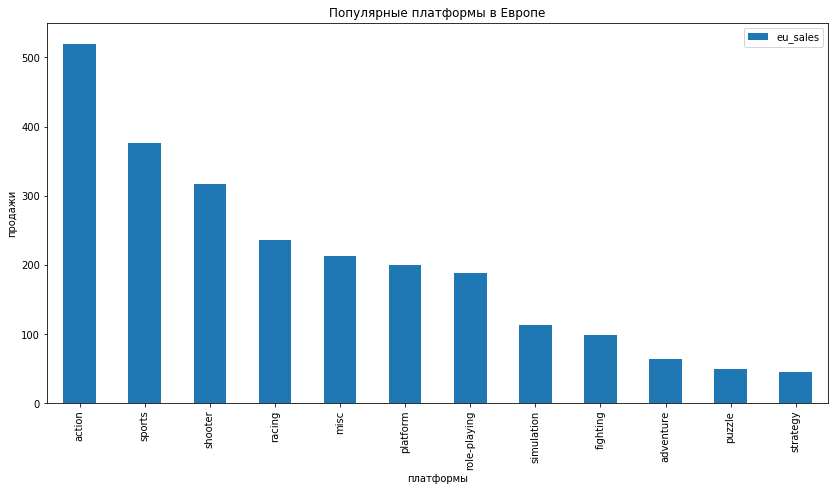

In [201]:
plt.figure();
table_eu_sales_genre.plot(figsize=(14,7),ylim=(0,550),kind = 'bar', title = 'Популярные платформы в Европе');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

In [202]:
top_table_eu_sales_genre=table_eu_sales_genre.head(5)
top_table_eu_sales_genre

,eu_sales
genre,
action,519.13
sports,376.79
shooter,317.34
racing,236.51
misc,212.74


Вывод: Топ-5 популярных жанров в Европе: action, sports, shooter, racing, misc

#### Посмотрим на продажи по жанрам в Японии

In [203]:
table_jp_sales_genre=games.groupby('genre').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False)
table_jp_sales_genre

,jp_sales
genre,
role-playing,355.41
action,161.43
sports,135.54
platform,130.83
misc,108.11
fighting,87.48
simulation,63.80
puzzle,57.31
racing,56.71


<Figure size 432x288 with 0 Axes>

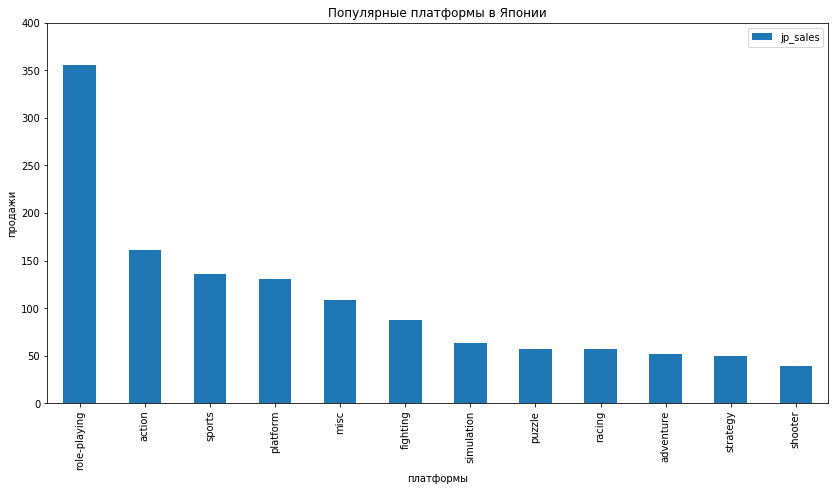

In [204]:
plt.figure();
table_jp_sales_genre.plot(figsize=(14,7),
                          ylim=(0,400),
                          kind = 'bar',
                          title = 'Популярные платформы в Японии');
plt.xlabel('платформы');
plt.ylabel('продажи');
plt.show();

In [205]:
top_table_jp_sales_genre=table_jp_sales_genre.head(5)
top_table_jp_sales_genre

,jp_sales
genre,
role-playing,355.41
action,161.43
sports,135.54
platform,130.83
misc,108.11


Вывод: Топ-5 популярных жанров в Японии: role-playing, action, sports, platform, misc

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [206]:
table_oll_region_rating=games.groupby('rating').agg({'na_sales':'sum',
                                                     'eu_sales':'sum',
                                                     'jp_sales':'sum'}).sort_values('na_sales',ascending=False)
table_oll_region_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,1522.21,855.16,324.67
unknown,1009.89,467.37,715.37
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.52,40.20
K-A,2.56,0.27,1.46
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


<Figure size 432x288 with 0 Axes>

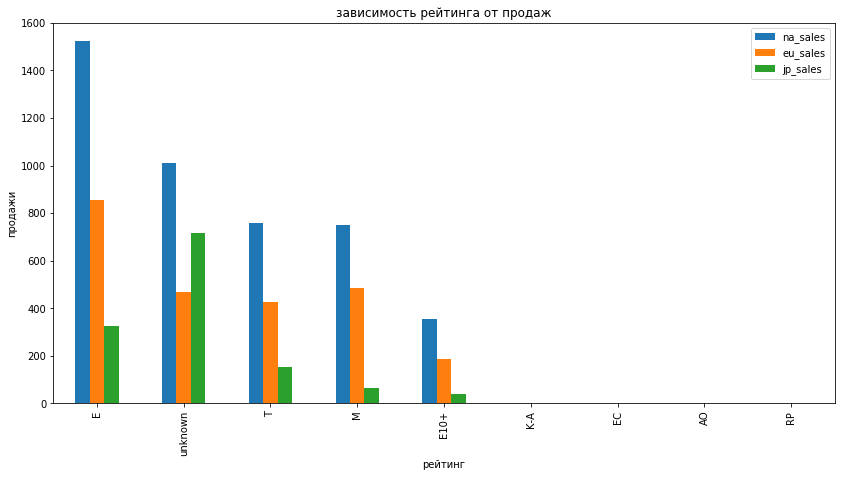

In [207]:
plt.figure();
table_oll_region_rating.plot(figsize=(14,7),
                             ylim=(0,1600),
                             kind = 'bar',
                             title = 'зависимость рейтинга от продаж');
plt.xlabel('рейтинг');
plt.ylabel('продажи');
plt.show();

Более менее приличный набор данных у нас есть по рейтингам: Е, unknown(неизвестный), T, M, E10+.
Видим что больше всего пропусков в рейтинге в северной америке, потом в Японии и в европе.



Рейтинг Е максимально популярен во всех регионах. При этом максимальное кол-во продаж осуществляется в северной америке, второе место - Европа, третье - Япония. 


Рейтинги T и M примерно одинаковые.

Рейтинг E10+ наиболее скромный из перечисленных (у кого есть приличный набор данных).


Т.к. распределение по пропорциям С.Америка/Европа/Япония примерно одинаково во всех рейтингах , следовательно рейтин не влияет на продажи в отдельном регионе. Геймеры всех стран в среднем предпочитают одно и то же.

Большая доля игр японского региона не имеет рейтинга : т.к. в Японии действует иная рейтинговая система CERO, поэтому и рейтинг ESRB необязателен. 

## Проверка гипотез

#### Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны

нулевая гипотеза: средние двух выборок равны.

    
альтернативная гипотеза гипотеза: средние двух выборок не равны.

In [208]:
games_xone=games[(games['user_score'].isnull()==False)&(games['platform']=='xone')&(games['year_of_release']>=2013)&(games['user_score']!=0)&(games['user_score']!=1)]
games_xone.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
15050,grand theft auto v,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,7.9,M,2015,5.47
15051,call of duty: advanced warfare,xone,2014.0,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,2015,5.26
15052,halo 5: guardians,xone,2015.0,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,2015,4.49


In [209]:
games_xone['user_score']

15050    7.9
15051    5.4
15052    6.4
15053    6.2
15055    4.1
        ... 
15287    6.8
15290    6.0
15291    8.2
15292    6.6
15294    6.7
Name: user_score, Length: 182, dtype: float32

In [210]:
games_xone['user_score'].mean()

6.521428

In [211]:
games_pc=games[(games['user_score'].isnull()==False)&(games['platform']=='pc')&(games['year_of_release']>=2013)&(games['user_score']!=0)&(games['user_score']!=1)]
games_pc.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
12745,the sims 4,pc,2014.0,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,2010,3.05
12771,starcraft ii: heart of the swarm,pc,2013.0,strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,2010,1.67
12780,simcity (2013),pc,2013.0,simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,2010,1.42


In [212]:
games_pc['user_score']

12745    3.9
12771    7.9
12780    2.2
12781    6.0
12784    5.4
        ... 
13666    8.3
13667    6.8
13673    7.9
13675    1.4
13703    7.6
Name: user_score, Length: 155, dtype: float32

In [213]:
games_pc['user_score'].mean()

6.2696776

Подсчитаем дисперсии для каждой из подгрупп

In [214]:
np.var(games_xone['user_score'])

1.8965188

In [215]:
np.var(games_pc['user_score'])

3.0163064

Найдем стандартное отклонение для каждой из подгрупп

In [216]:
np.std(games_xone['user_score'])

1.3771416

In [217]:
np.std(games_pc['user_score'])

1.7367517

In [218]:
alpha = 0.05
results = st.ttest_ind(games_xone['user_score'], games_pc['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759702913383088
Не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть нулевую гипотезу: средние двух выборок равны.

Полученное значение p-value говорит о том, что такое или большее различие можно получить случайно в 6% случаев. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.



#### Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

нулевая гипотеза: средние двух выборок равны.

    
альтернативная гипотеза: средние двух выборок не равны.

In [219]:
games_action=games[(games['user_score'].isnull()==False)&(games['genre']=='action')&(games['year_of_release']>=2013)&(games['user_score']!=0)&(games['user_score']!=1)]
games_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
88,disney infinity,wii,2013.0,action,1.05,0.41,0.00,0.14,NaN,4.2,E10+,2009,1.60
1914,lego marvel super heroes,ds,2013.0,action,0.22,0.13,0.00,0.03,NaN,4.8,E10+,2008,0.38
3668,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,2010,16.27
3718,assassin's creed iv: black flag,x360,2013.0,action,1.90,1.11,0.01,0.29,86.0,7.9,M,2010,3.31
3764,lego marvel super heroes,x360,2013.0,action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2010,2.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,samurai warriors chronicles 3,psv,2014.0,action,0.00,0.00,0.06,0.00,70.0,7.9,T,2014,0.06
16329,gal gun: double peace,psv,2015.0,action,0.00,0.02,0.01,0.01,NaN,8.1,M,2014,0.04
16383,aegis of earth: protonovus assault,psv,2016.0,action,0.01,0.01,0.00,0.01,NaN,8.3,T,2014,0.03
16389,blazblue: chrono phantasma extend,psv,2015.0,action,0.00,0.02,0.00,0.01,NaN,6.8,T,2014,0.03


In [220]:
games_action['user_score'].mean()

6.8366666

In [221]:
games_sports=games[(games['user_score'].isnull()==False)&(games['genre']=='sports')&(games['year_of_release']>=2013)&(games['user_score']!=0)&(games['user_score']!=1)]
games_sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,median_year_of_release,sum_sales
290,fifa 15,wii,2014.0,sports,0.15,0.37,0.00,0.04,NaN,4.3,E,2009,0.56
416,fifa 14,wii,2013.0,sports,0.00,0.36,0.00,0.02,NaN,4.3,E,2009,0.38
3702,fifa 14,x360,2013.0,sports,0.92,2.89,0.01,0.40,84.0,4.2,E,2010,4.22
3728,fifa 15,x360,2014.0,sports,0.79,1.92,0.00,0.21,NaN,4.2,E,2010,2.92
3750,nba 2k14,x360,2013.0,sports,2.10,0.19,0.00,0.23,87.0,4.9,E,2010,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,fifa 15,psv,2014.0,sports,0.08,0.35,0.05,0.12,NaN,3.1,E,2014,0.60
16104,fifa 14,psv,2013.0,sports,0.08,0.23,0.01,0.09,NaN,1.8,E,2014,0.41
16203,mlb 13: the show,psv,2013.0,sports,0.10,0.00,0.00,0.02,75.0,7.5,E,2014,0.12
16210,mlb 14: the show,psv,2014.0,sports,0.08,0.00,0.00,0.03,68.0,7.0,E,2014,0.11


In [222]:
games_sports['user_score'].mean()

5.238125

Подсчитаем дисперсии для каждой из подгрупп

In [223]:
np.var(games_action['user_score'])

1.7605786

In [224]:
np.var(games_sports['user_score'])

3.160734

In [225]:
alpha = 0.05
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.47118179065227e-20
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу (нулевая гипотеза: средние двух выборок равны) и принимаем альтернативную (средние двух выборок не равны (РАЗНЫЕ)).

## Вывод

Вывод: 
    
 - Лидером выхода по медианным значениям в годах выхода игр является платформа xone. 
 - Лидерами по количеству платформ в нашем датасете являются ps2 и ds
    
    
    
- Самым распростроненным жанром является action - 22% от общей массы. Антирекорд поставил жанр strategy. 
- Самый "урожайный" год относительно выхода игр был 2009.

- Игра с самой большой хар-кой продаж является: wii sports

- По критерию count_sales - удельная цена игры у нас лидеры:

    shooter:M
    action:M
    role-playing:M
    platform:E
    role-playing:E
    
- по удельным характеристикам прибыли (суммарная прибыли/суммарное кол-во по жанру) у нас лидирует platform (безотносительно рейтинга)

- Примерно с 1993 года кол-во игр начало расти! Но рост продаж активно начался только с 2005 года.


- Медианное значение жизни платформы 6 лет. Среднее: четь меньше 8 лет.

- Время жизни платформ: pc и ds у нас лидеры, а gg,pcfx, tg16 - аутсайдеры.

- В целом идет спад по прадажам игр. 

- Скомпоновали группу топ-5 самых перспективных платформ: x360, ps3, wii, ps4, pc. Корреляция оценок пользователей/критиков от объема продаж колеблется в районе: 0.3-0.6

- Самый прибыльный жанр, ПО АБСОЛЮТНЫМ ПОКАЗАТЕЛЯМ, в нашей выборке - action


- Портрет пользователя по всем регионам (не учитывали other) получился похожим: топ-5 самых популярных платформ во всех трех регионах являются х360, ps2, wii, ps3, ds. 54% - доля Северной Америки, 30% - доля Европы, 16% - доля Японии.

- Распределение по пропорциям С.Америка/Европа/Япония примерно одинаково во всех рейтингах , следовательно рейтин не влияет на продажи в отдельном регионе. Геймеры всех стран в среднем предпочитают одно и то же.


- action и sports, misc вошли в пятерку самых популярных жанров во всех трех регионах (остальные у каждого свои)